In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family= font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 1. 가장 많이 이용하는 ott 서비스 1순위 

### 성별/나이별/소득별/지역/가구원수1

소득별은 왜? - 구독료가 있으니까 소득별로 구독하는 ott가 다를까 ?

+ 구분별, 왜 선택 했는지 이유가 들어가면 좋을것 같음- 가설 설정?

### 1)  데이터 전처리

In [7]:
# 엑셀 파일 불러오기

ott_s = pd.read_excel("data/가장_많이_이용하는_OTT_서비스_1순위.xlsx",  header=[0,1], index_col=[0,1])
ott_s

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


구분별(2)               2020                                               \
구분별(2)            사례수 (명) 티빙(Tving) (%) 웨이브(Wavve)(구 푹(pooq), 옥수수) (%)   
전체    소계           7434.0           4.4                            4.0   
성별    남            3872.0           3.9                            3.9   
      여            3562.0           4.9                            4.0   
연령    만10대미만        173.0           1.2                            0.0   
      만10-19세       825.0           3.8                            1.0   
      만20-29세      1378.0           6.3                            3.8   
      만30-39세      1420.0           4.3                            8.1   
      만40-49세      1481.0           5.2                            4.3   
      만50-59세      1373.0           3.8                            2.0   
      만60-69세       666.0           2.2                            3.8   
      만70세이상        119.0           1.1                            4.1   
월평균소득 소득없음         2477.0           4.7                            2.3   
      50만원미만        138.0           9.6                            2.6   
      50-100만원미만    222.0           2.2                            4.3   
      100-200만원미만  1120.0           4.9                            4.7   
      200-300만원미만  1961.0           4.2                            5.0   
      300-400만원미만  1026.0           3.6                            5.6   
      400-500만원미만   266.0           4.8                            1.1   
      500만원이상       224.0           1.6                            7.1   
지역    서울           1482.0           4.4                            6.2   
      부산            524.0           0.2                            0.7   
      대구            335.0           3.9                            3.1   
      인천            452.0           1.9                            3.5   
      광주            248.0           5.6                            0.3   
      대전            213.0           1.3                            4.0   
      울산            176.0           0.2                            1.8   
      경기           1907.0           9.5                            4.9   
      강원            181.0           0.3                            1.6   
      충북            264.0           2.2                            1.2   
      충남            265.0           3.2                            7.1   
      전북            262.0           2.2                            0.4   
      전남            245.0           4.7                            0.7   
      경북            291.0           0.8                           11.0   
      경남            427.0           0.4                            1.5   
      제주             83.0           0.3                            2.9   
      세종             79.0           4.0                            0.0   
가구원수1 1인가구          822.0           1.5                            8.4   
      2인가구         1586.0           4.9                            3.6   
      3인이상가구       5027.0           4.7                            3.4   

구분별(2)                                                                    \
구분별(2)            KT 시즌(Seezn)(구 olleh tv 모바일) (%) U+ 모바일(구 U+비디오포털) (%)   
전체    소계                                       1.0                   1.3   
성별    남                                        1.1                   1.3   
      여                                        0.8                   1.3   
연령    만10대미만                                   2.7                   0.0   
      만10-19세                                  0.5                   0.5   
      만20-29세                                  0.7                   0.9   
      만30-39세                                  0.6                   1.5   
      만40-49세                                  1.2                   2.5   
      만50-59세                                  0.9                   0.8   
      만60-69세                                  1.9                   1.1   
      만70세이상                                   2.5   

In [8]:
# 컬럼 명 변경

ott_s.columns =[["2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020","2020",
               "2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021"],
              ["명 수","티빙", "웨이브", "KT_Seezn", "U+모바일", "에브리온TV", "네이버시리즈", "곰TV", "넷플릭스","카카오TV", "유튜브프리미엄", "아마존프라임", "왓챠플레이","기타",
              "명 수","티빙", "웨이브", "KT_Seezn", "U+모바일", "네이버시리즈", "곰TV", "넷플릭스","카카오TV", "유튜브프리미엄", "아마존프라임", "왓챠플레이","쿠팡플레이","아프리카TV","기타"]]

In [9]:
ott_s.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39 entries, ('전체', '소계') to ('가구원수1', '3인이상가구')
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (2020, 명 수)       39 non-null     float64
 1   (2020, 티빙)        39 non-null     float64
 2   (2020, 웨이브)       39 non-null     float64
 3   (2020, KT_Seezn)  39 non-null     float64
 4   (2020, U+모바일)     39 non-null     float64
 5   (2020, 에브리온TV)    39 non-null     float64
 6   (2020, 네이버시리즈)    39 non-null     float64
 7   (2020, 곰TV)       39 non-null     float64
 8   (2020, 넷플릭스)      39 non-null     float64
 9   (2020, 카카오TV)     39 non-null     float64
 10  (2020, 유튜브프리미엄)   39 non-null     float64
 11  (2020, 아마존프라임)    39 non-null     float64
 12  (2020, 왓챠플레이)     39 non-null     float64
 13  (2020, 기타)        39 non-null     float64
 14  (2021, 명 수)       39 non-null     float64
 15  (2021, 티빙)        39 non-null     float64
 16  (2021, 웨이브)       

In [40]:
ott_s["2020"]

명 수   티빙   웨이브  KT_Seezn  U+모바일  에브리온TV  네이버시리즈  곰TV  \
전체    소계           7434.0  4.4   4.0       1.0    1.3     0.0     0.7  0.2   
성별    남            3872.0  3.9   3.9       1.1    1.3     0.0     0.7  0.2   
      여            3562.0  4.9   4.0       0.8    1.3     0.1     0.6  0.1   
연령    만10대미만        173.0  1.2   0.0       2.7    0.0     0.0     0.0  0.0   
      만10-19세       825.0  3.8   1.0       0.5    0.5     0.0     0.4  0.1   
      만20-29세      1378.0  6.3   3.8       0.7    0.9     0.0     0.6  0.1   
      만30-39세      1420.0  4.3   8.1       0.6    1.5     0.0     0.7  0.3   
      만40-49세      1481.0  5.2   4.3       1.2    2.5     0.2     0.9  0.2   
      만50-59세      1373.0  3.8   2.0       0.9    0.8     0.0     1.1  0.1   
      만60-69세       666.0  2.2   3.8       1.9    1.1     0.0     0.4  0.0   
      만70세이상        119.0  1.1   4.1       2.5    1.8     0.0     0.0  0.0   
월평균소득 소득없음         2477.0  4.7   2.3       0.8    0.9     0.1     0.6  0.1   
      50만원미만        138.0  9.6   2.6       1.9    2.3     0.0     0.0  0.0   
      50-100만원미만    222.0  2.2   4.3       3.0    3.6     0.0     0.9  0.0   
      100-200만원미만  1120.0  4.9   4.7       0.9    0.8     0.1     0.2  0.3   
      200-300만원미만  1961.0  4.2   5.0       0.6    0.9     0.0     0.5  0.1   
      300-400만원미만  1026.0  3.6   5.6       1.5    2.5     0.1     1.2  0.4   
      400-500만원미만   266.0  4.8   1.1       1.3    2.1     0.0     2.0  0.0   
      500만원이상       224.0  1.6   7.1       1.7    1.5     0.0     1.8  0.4   
지역    서울           1482.0  4.4   6.2       1.2    2.9     0.1     0.6  0.1   
      부산            524.0  0.2   0.7       0.0    0.7     0.0     1.1  0.0   
      대구            335.0  3.9   3.1       1.5    1.2     0.0     1.4  0.3   
      인천            452.0  1.9   3.5       0.4    0.3     0.0     1.3  0.0   
      광주            248.0  5.6   0.3       0.0    0.0     0.0     0.0  0.0   
      대전            213.0  1.3   4.0       0.2    0.0     0.0     0.0  1.4   
      울산            176.0  0.2   1.8       2.0    1.0     0.0     0.9  0.0   
      경기           1907.0  9.5   4.9       1.4    1.5     0.1     0.8  0.0   
      강원            181.0  0.3   1.6       2.6    1.5     0.0     0.0  0.0   
      충북            264.0  2.2   1.2       0.0    0.1     0.0     0.0  1.4   
      충남            265.0  3.2   7.1       0.3    0.8     0.0     0.9  0.0   
      전북            262.0  2.2   0.4       0.0    0.3     0.0     0.0  0.2   
      전남            245.0  4.7   0.7       0.0    0.0     0.0     0.4  0.2   
      경북            291.0  0.8  11.0       1.2    1.1     0.0     1.1  0.2   
      경남            427.0  0.4   1.5       0.9    0.5     0.0     0.5  0.2   
      제주             83.0  0.3   2.9       6.0    1.4     0.0     1.1  0.0   
      세종             79.0  4.0   0.0       0.0    0.0     0.0     0.0  0.0   
가구원수1 1인가구          822.0  1.5   8.4       0.5    0.8     0.0     0.0  0.0   
      2인가구         1586.0  4.9   3.6       0.5    0.6     0.0     0.8  0.0   
      3인이상가구       5027.0  4.7   3.4       1.2    1.6     0.1     0.8  0.2   

                   넷플릭스  카카오TV  유튜브프리미엄  아마존프라임  왓챠플레이   기타  
전체    소계            7.1    1.6     79.1     0.5    0.1  0.0  
성별    남             6.5    1.6     80.2     0.5    0.0  0.0  
      여             7.8    1.7     77.9     0.6    0.2  0.0  
연령    만10대미만        0.9    0.0     95.2     0.0    0.0  0.0  
      만10-19세       4.6    1.3     87.5     0.3    0.1  0.0  
      만20-29세      13.1    1.9     71.8     0.4    0.2  0.0  
      만30-39세       9.5    1.2     73.0     0.6    0.2  0.0  
      만40-49세       7.7    1.0     76.3     0.5    0.1  0.0  
      만50-59세       3.8    2.1     85.1     0.3    0.0  0.0  
      만60-69세       1.2    2.7     85.4     1.4    0.0  0.0  
      만70세이상        0.0    3.6     86.1     0.8    0.0  0.0  
월평균소득 소득없음          5.5    1.0     83.3     0.6    0.0  0.0  
      50만원미만        6.2    0.5     73.5     2.3    1.0  0.0  
      50-100만원미만    8.0    1.2   

In [41]:
ott_s["2021"]

명 수   티빙  웨이브  KT_Seezn  U+모바일  네이버시리즈  곰TV  넷플릭스  \
전체    소계           8293.7  2.9  2.3       0.5    0.9     0.3  0.2   8.8   
성별    남            4283.5  2.1  2.6       0.7    0.9     0.3  0.2   8.1   
      여            4010.2  3.8  2.0       0.4    0.9     0.4  0.1   9.5   
연령    만10대미만        174.5  1.5  0.6       1.2    0.0     0.0  0.0   6.2   
      만10-19세       880.1  1.2  0.8       0.2    0.3     0.1  0.2   6.8   
      만20-29세      1381.4  5.3  1.5       0.7    0.5     0.5  0.2  17.1   
      만30-39세      1390.1  4.4  5.4       0.4    0.8     0.3  0.3  11.3   
      만40-49세      1585.9  2.9  3.4       0.3    1.6     0.5  0.1  11.1   
      만50-59세      1580.6  2.1  1.5       0.5    1.0     0.3  0.3   4.7   
      만60-69세      1025.7  1.1  0.8       0.6    1.2     0.3  0.1   1.3   
      만70세이상        275.5  0.6  1.1       1.4    0.3     0.0  0.0   0.4   
월평균소득 소득없음         2631.2  2.2  1.4       0.4    0.7     0.4  0.1   8.4   
      50만원미만        175.9  3.5  0.0       0.0    0.3     0.0  0.0   6.8   
      50-100만원미만    317.8  0.9  0.9       2.7    0.3     0.0  0.0   5.8   
      100-200만원미만  1094.2  1.3  2.6       0.4    1.1     0.1  0.3   9.5   
      200-300만원미만  2118.0  4.1  2.3       0.4    0.9     0.2  0.1   8.9   
      300-400만원미만  1326.0  4.6  3.6       0.7    1.2     0.3  0.5   7.9   
      400-500만원미만   358.2  1.6  5.2       0.8    0.7     1.0  0.0  15.4   
      500만원이상       272.5  2.1  4.0       0.2    1.7     1.2  0.0   9.1   
지역    서울           1626.1  5.5  4.1       0.3    2.3     0.4  0.2   8.8   
      부산            555.7  0.6  0.4       0.0    0.2     0.0  0.0   5.3   
      대구            358.0  1.9  5.4       0.7    0.4     1.4  0.7  16.2   
      인천            499.5  1.9  2.9       0.2    0.3     0.7  0.0   7.9   
      광주            263.0  1.1  0.3       0.0    0.0     0.0  0.0   5.3   
      대전            219.8  0.0  0.1       0.7    0.0     0.0  0.0   9.4   
      울산            187.4  1.6  0.3       1.2    0.4     0.0  0.0   8.5   
      경기           2226.8  4.2  3.0       0.8    1.1     0.4  0.4  11.4   
      강원            207.4  0.6  2.7       3.0    0.2     0.0  0.0   9.1   
      충북            279.8  0.4  0.7       0.0    0.0     0.1  0.0   6.4   
      충남            305.8  0.0  0.2       0.0    0.7     0.0  0.0   7.6   
      전북            292.8  3.4  1.6       0.0    0.1     0.3  0.2   2.9   
      전남            279.7  0.5  0.1       0.0    0.4     0.1  0.0   0.5   
      경북            318.2  4.0  1.6       0.8    1.1     1.0  0.2   3.7   
      경남            501.1  0.9  0.3       0.8    0.2     0.0  0.0   9.1   
      제주             84.5  1.0  3.9       0.0    0.0     0.0  0.0   6.0   
      세종             88.1  0.0  0.0       0.0    0.0     0.0  0.0  23.9   
가구원수1 1인가구          951.3  6.0  4.9       0.5    1.0     0.3  0.0  10.8   
      2인가구         1947.3  2.9  1.4       0.4    1.1     0.1  0.0   6.7   
      3인이상가구       5395.1  2.4  2.2       0.6    0.8     0.4  0.3   9.2   

                   카카오TV  유튜브프리미엄  아마존프라임  왓챠플레이  쿠팡플레이  아프리카TV   기타  
전체    소계             1.8     81.5     0.0    0.2    0.2     0.3  0.0  
성별    남              1.6     82.6     0.0    0.1    0.1     0.5  0.1  
      여              2.0     80.3     0.0    0.3    0.3     0.1  0.0  
연령    만10대미만         0.0     90.2     0.0    0.0    0.0     0.0  0.4  
      만10-19세        3.5     86.2     0.0    0.4    0.0     0.1  0.1  
      만20-29세        1.4     70.3     0.0    0.6    0.1     1.5  0.1  
      만30-39세        2.1     74.2     0.0    0.3    0.5     0.0  0.0  
      만40-49세        2.0     77.4     0.0    0.1    0.4     0.1  0.0  
      만50-59세        1.6     87.8     0.0    0.0    0.0     0.1  0.0  
      만60-69세        0.3     94.2     0.0    0.0    0.0     0.0  0.0  
      만70세이상         2.3     94.0     0.0    0.0    0.0     0.0  0.0  
월평균소득 소득없음           2.1     83.3     0.0    0.4    0.1     0.4  0.1  
      50만원미만         0.5     88.4     0.0    0.0    0.5     0.0  0.0  
      50-100만원미만     0.3   

In [10]:
# 컬럼 합치기 - 기타 컬럼

ott_s["2020","기타"] = ott_s["2020","기타"] + ott_s["2020","KT_Seezn"] + ott_s["2020","네이버시리즈"] + ott_s["2020","에브리온TV"] + ott_s["2020","곰TV"] + ott_s["2020","왓챠플레이"] + ott_s["2020","아마존프라임"]
ott_s["2021","기타"] = ott_s["2021","기타"] + ott_s["2021","KT_Seezn"] + ott_s["2021","네이버시리즈"] + ott_s["2021","곰TV"] + ott_s["2021","아마존프라임"] + ott_s["2021","왓챠플레이"] + ott_s["2021","쿠팡플레이"] + ott_s["2021","아프리카TV"]


In [11]:
# 필요없는 컬럼 지우기

del ott_s["2020","KT_Seezn"]
del ott_s["2020","네이버시리즈"] 
del ott_s["2020","에브리온TV"]
del ott_s["2020","곰TV"]
del ott_s["2020","왓챠플레이"]
del ott_s["2020","아마존프라임"]

del ott_s["2021","KT_Seezn"]
del ott_s["2021","네이버시리즈"] 
del ott_s["2021","곰TV"] 
del ott_s["2021","아마존프라임"]
del ott_s["2021","왓챠플레이"]
del ott_s["2021","쿠팡플레이"]
del ott_s["2021","아프리카TV"]


In [12]:

################################################################################## 

# 명 수로 변환 하지 않고 그냥 원본 데이터 %로 사용 하기로 했다.
#  인원수로 변환 - "명 수" 를 제외한 모든 컬럼은 % 이므로 인원수로 변환 시켜 준다.

s_20["티빙"]= round(s_20["티빙"]/100 *s_20["명 수"])
s_20["웨이브"]= round(s_20["웨이브"]/100 *s_20["명 수"])
s_20["KT_Seezn"]= round(s_20["KT_Seezn"]/100 *s_20["명 수"])
s_20["U+모바일"]= round(s_20["U+모바일"]/100 *s_20["명 수"])
s_20["네이버시리즈"]=round(s_20["네이버시리즈"]/100 *s_20["명 수"])
s_20["넷플릭스"]=round(s_20["넷플릭스"]/100 *s_20["명 수"])
s_20["카카오TV"]=round(s_20["카카오TV"]/100 *s_20["명 수"])
s_20["유튜브프리미엄"]= round(s_20["유튜브프리미엄"]/100 *s_20["명 수"])
s_20["아마존프라임"]=round(s_20["아마존프라임"]/100 *s_20["명 수"])
s_20["기타"]=round(s_20["기타"]/100 *s_20["명 수"])

s_21["티빙"]=round(s_21["티빙"]/100 *s_21["명 수"])
s_21["웨이브"]=round(s_21["웨이브"]/100 *s_21["명 수"])
s_21["KT_Seezn"]=round(s_21["KT_Seezn"]/100 *s_21["명 수"])
s_21["U+모바일"]=round(s_21["U+모바일"]/100 *s_21["명 수"])
s_21["넷플릭스"]=round(s_21["넷플릭스"]/100 *s_21["명 수"])
s_21["카카오TV"]=round(s_21["카카오TV"]/100 *s_21["명 수"])
s_21["유튜브프리미엄"]=round(s_21["유튜브프리미엄"]/100 *s_21["명 수"])
s_21["기타"]=round(s_21["기타"]/100 *s_21["명 수"])

C:\Users\LG\AppData\Local\Temp\ipykernel_7808\2359766938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_20["티빙"]= round(s_20["티빙"]/100 *s_20["명 수"])
C:\Users\LG\AppData\Local\Temp\ipykernel_7808\2359766938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_20["웨이브"]= round(s_20["웨이브"]/100 *s_20["명 수"])
C:\Users\LG\AppData\Local\Temp\ipykernel_7808\2359766938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [16]:
# 연도별 증감율....?

# 컬럼이 다름.... 
(s_21["티빙"] - s_20["티빙"])/ s_20["티빙"] *100
#(s_21["넷플릭스"] - s_20["넷플릭스"])/ s_20["넷플릭스"] *100

전체     소계             -26.299694
성별     남              -40.397351
       여              -13.142857
연령     만10대미만          50.000000
       만10-19세        -64.516129
       만20-29세        -16.091954
       만30-39세          0.000000
       만40-49세        -40.259740
       만50-59세        -36.538462
       만60-69세        -26.666667
       만70세이상         100.000000
월평균소득  소득없음           -50.000000
       50만원미만         -53.846154
       50-100만원미만     -40.000000
       100-200만원미만    -74.545455
       200-300만원미만      6.097561
       300-400만원미만     64.864865
       400-500만원미만    -53.846154
       500만원이상         50.000000
지역     서울              36.923077
       부산             200.000000
       대구             -46.153846
       인천               0.000000
       광주             -78.571429
       대전            -100.000000
       울산                    inf
       경기             -48.066298
       강원               0.000000
       충북             -83.333333
       충남            -100.000000
       전북 

In [ ]:
# 함수화

In [12]:
# 중간 저장(체크 포인트)
ott_s.to_excel("data/ott_service_20_21.xlsx")

In [13]:
ott_s_copy = pd.read_excel("data/ott_service_20_21.xlsx",  header=[0,1], index_col=[0,1])

ott_s_copy

2020                                              2021  \
                    명 수   티빙   웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타     명 수   
전체    소계           7434  4.4   4.0   1.3   7.1   1.6    79.1  2.5  8293.7   
성별    남            3872  3.9   3.9   1.3   6.5   1.6    80.2  2.5  4283.5   
      여            3562  4.9   4.0   1.3   7.8   1.7    77.9  2.4  4010.2   
연령    만10대미만        173  1.2   0.0   0.0   0.9   0.0    95.2  2.7   174.5   
      만10-19세       825  3.8   1.0   0.5   4.6   1.3    87.5  1.4   880.1   
      만20-29세      1378  6.3   3.8   0.9  13.1   1.9    71.8  2.0  1381.4   
      만30-39세      1420  4.3   8.1   1.5   9.5   1.2    73.0  2.4  1390.1   
      만40-49세      1481  5.2   4.3   2.5   7.7   1.0    76.3  3.1  1585.9   
      만50-59세      1373  3.8   2.0   0.8   3.8   2.1    85.1  2.4  1580.6   
      만60-69세       666  2.2   3.8   1.1   1.2   2.7    85.4  3.7  1025.7   
      만70세이상        119  1.1   4.1   1.8   0.0   3.6    86.1  3.3   275.5   
월평균소득 소득없음         2477  4.7   2.3   0.9   5.5   1.0    83.3  2.2  2631.2   
      50만원미만        138  9.6   2.6   2.3   6.2   0.5    73.5  5.2   175.9   
      50-100만원미만    222  2.2   4.3   3.6   8.0   1.2    76.2  4.5   317.8   
      100-200만원미만  1120  4.9   4.7   0.8   5.2   4.1    78.4  1.9  1094.2   
      200-300만원미만  1961  4.2   5.0   0.9   8.6   1.3    78.1  1.9  2118.0   
      300-400만원미만  1026  3.6   5.6   2.5   9.5   1.3    73.8  3.7  1326.0   
      400-500만원미만   266  4.8   1.1   2.1  11.8   1.1    75.8  3.3   358.2   
      500만원이상       224  1.6   7.1   1.5   4.8   1.8    78.9  4.2   272.5   
지역    서울           1482  4.4   6.2   2.9  12.3   2.2    69.6  2.3  1626.1   
      부산            524  0.2   0.7   0.7   5.2   1.1    90.4  1.8   555.7   
      대구            335  3.9   3.1   1.2   9.5   1.8    76.5  3.9   358.0   
      인천            452  1.9   3.5   0.3   5.1   0.8    86.5  2.0   499.5   
      광주            248  5.6   0.3   0.0   4.6   1.5    86.4  1.6   263.0   
      대전            213  1.3   4.0   0.0   6.3   3.0    82.9  2.4   219.8   
      울산            176  0.2   1.8   1.0   1.2   0.4    92.2  3.3   187.4   
      경기           1907  9.5   4.9   1.5   6.6   1.8    73.1  2.5  2226.8   
      강원            181  0.3   1.6   1.5   6.8   0.0    86.9  3.0   207.4   
      충북            264  2.2   1.2   0.1   7.7   2.0    84.6  2.3   279.8   
      충남            265  3.2   7.1   0.8   1.9   1.7    84.2  1.2   305.8   
      전북            262  2.2   0.4   0.3   9.6   2.0    85.2  0.3   292.8   
      전남            245  4.7   0.7   0.0   3.6   0.8    83.3  6.8   279.7   
      경북            291  0.8  11.0   1.1   4.4   0.8    79.0  2.9   318.2   
      경남            427  0.4   1.5   0.5   4.3   1.8    89.1  2.5   501.1   
      제주             83  0.3   2.9   1.4   3.7   0.0    84.6  7.1    84.5   
      세종             79  4.0   0.0   0.0   7.8   0.8    87.3  0.0    88.1   
가구원수1 1인가구          822  1.5   8.4   0.8   9.6   1.6    77.2  0.8   951.3   
      2인가구         1586  4.9   3.6   0.6   6.5   2.5    79.7  2.2  1947.3   
      3인이상가구       5027  4.7   3.4   1.6   6.9   1.4    79.2  2.8  5395.1   

                                                            
                    티빙  웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타  
전체    소계           2.9  2.3   0.9   8.8   1.8    81.5  1.7  
성별    남            2.1  2.6   0.9   8.1   1.6    82.6  2.0  
      여            3.8  2.0   0.9   9.5   2.0    80.3  1.6  
연령    만10대미만       1.5  0.6   0.0   6.2   0.0    90.2  1.6  
      만10-19세      1.2  0.8   0.3   6.8   3.5    86.2  1.1  
      만20-29세      5.3  1.5   0.5  17.1   1.4    70.3  3.7  
      만30-39세      4.4  5.4   0.8  11.3   2.1    74.2  1.8  
      만40-49세      2.9  3.4   1.6  11.1   2.0    77.4  1.5  
      만50-59세      2.1  1.5   1.0   4.7   1.6    87.8  1.2  
      만60-69세      1.1  0.8   1.2   1.3   0.3    94.2  1.0  
      만70세이상       0.6  1.1   0.3   0.4   2.3    94.0  1.4  
월평균소득 소득없음         2.2  1.4   0.7   8.4   2.1    83.3  1.9  
      5

### 2)  EDA
구분별 데이터 탐색

In [46]:
# 성별

#del ott_s_copy ["2020","명 수"]
#del ott_s_copy ["2021","명 수"]

ott_s_sex = ott_s_copy.loc["성별"]

ott_s_sex.T

남     여
2020 티빙        3.9   4.9
     웨이브       3.9   4.0
     U+모바일     1.3   1.3
     넷플릭스      6.5   7.8
     카카오TV     1.6   1.7
     유튜브프리미엄  80.2  77.9
     기타        2.5   2.4
2021 티빙        2.1   3.8
     웨이브       2.6   2.0
     U+모바일     0.9   0.9
     넷플릭스      8.1   9.5
     카카오TV     1.6   2.0
     유튜브프리미엄  82.6  80.3
     기타        2.0   1.6

<AxesSubplot:>

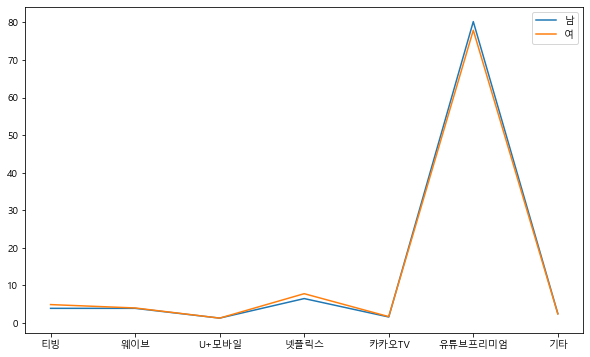

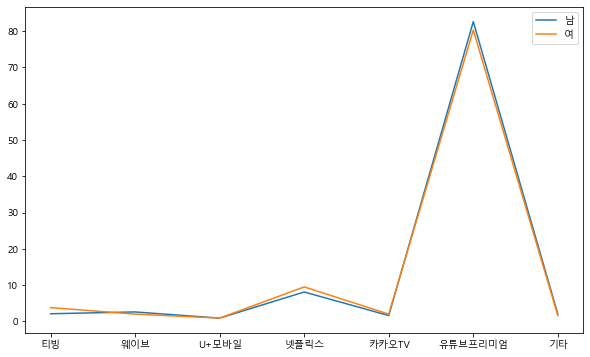

In [47]:
ott_s_sex.T.loc["2020"].plot(figsize=(10,6))
ott_s_sex.T.loc["2021"].plot(figsize=(10,6))

# 시각적으로는 성별 플랫폼 이용이 비슷해 보이고 연도별, 플랫폼 이용에 대한 큰 변화율이 보이지 않는다.
# 유튜브 프리미엄의 이용률이 타 플랫폼에 비해 앞도적으로 높다.

In [59]:
# 각 플랫폼 별 증감률

ott_s_sex

#국내
(ott_s_sex["2021","티빙"]-ott_s_sex["2020","티빙"])/ott_s_sex["2020","티빙"] *100
(ott_s_sex["2021","웨이브"]-ott_s_sex["2020","웨이브"])/ott_s_sex["2020","웨이브"] *100

#국외
(ott_s_sex["2021","넷플릭스"]-ott_s_sex["2020","넷플릭스"])/ott_s_sex["2020","넷플릭스"] *100
(ott_s_sex["2021","유튜브프리미엄"]-ott_s_sex["2020","유튜브프리미엄"])/ott_s_sex["2020","유튜브프리미엄"] *100


# 국내 ott 플랫폼인 티빙과 웨이브는 이용률이 감소
# 해외 ott 플랫폼인 넷플릭스와 유튜브 프리미엄은 이용률 증가

### 국내 플랫폼이 해외 플랫폼에 밀리는 이유가 있을까?

남   -33.333333
여   -50.000000
dtype: float64

In [60]:
# 연령
ott_s_age = ott_s_copy.loc["연령"]

ott_s_age

2020                                     2021                         \
          티빙  웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타   티빙  웨이브 U+모바일  넷플릭스 카카오TV   
만10대미만   1.2  0.0   0.0   0.9   0.0    95.2  2.7  1.5  0.6   0.0   6.2   0.0   
만10-19세  3.8  1.0   0.5   4.6   1.3    87.5  1.4  1.2  0.8   0.3   6.8   3.5   
만20-29세  6.3  3.8   0.9  13.1   1.9    71.8  2.0  5.3  1.5   0.5  17.1   1.4   
만30-39세  4.3  8.1   1.5   9.5   1.2    73.0  2.4  4.4  5.4   0.8  11.3   2.1   
만40-49세  5.2  4.3   2.5   7.7   1.0    76.3  3.1  2.9  3.4   1.6  11.1   2.0   
만50-59세  3.8  2.0   0.8   3.8   2.1    85.1  2.4  2.1  1.5   1.0   4.7   1.6   
만60-69세  2.2  3.8   1.1   1.2   2.7    85.4  3.7  1.1  0.8   1.2   1.3   0.3   
만70세이상   1.1  4.1   1.8   0.0   3.6    86.1  3.3  0.6  1.1   0.3   0.4   2.3   

                      
        유튜브프리미엄   기타  
만10대미만     90.2  1.6  
만10-19세    86.2  1.1  
만20-29세    70.3  3.7  
만30-39세    74.2  1.8  
만40-49세    77.4  1.5  
만50-59세    87.8  1.2  
만60-69세    94.2  1.0  
만70세이상     94.0  1.4

<AxesSubplot:>

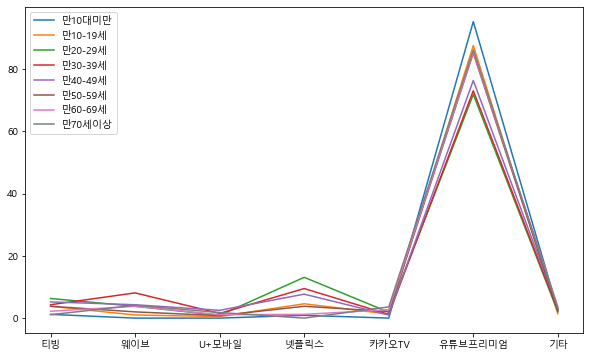

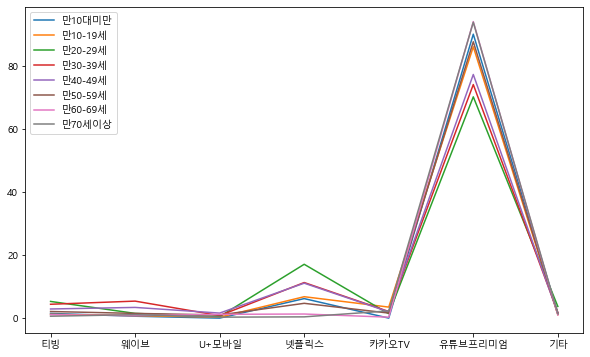

In [61]:
ott_s_age.T.loc["2020"].plot(figsize=(10,6))
ott_s_age.T.loc["2021"].plot(figsize=(10,6))

# 시각적으로는 나이대별 변동을 알수 없음
# 다만 눈으로 보기에 넷플릭스 유튜브 프리미엄에 나이대별 증감이 있어보임

In [79]:
# 각 플랫폼 별 증감률

(ott_s_age["2021","유튜브프리미엄"]-ott_s_age["2020","유튜브프리미엄"])/ott_s_age["2020","유튜브프리미엄"] *100
# 30대 미만의 그룹은 이용이 소폭 감소(주 소비층이라고 예상했던 10~20의 이용률은 감소), 오히려 50대~ 70대의 이용률 증가가 눈에 띈다.

(ott_s_age["2021","넷플릭스"]-ott_s_age["2020","넷플릭스"])/ott_s_age["2020","넷플릭스"] *100
# 넷플릭스는 전반적으로 전 연령대 이용이 증가 했다.

#그렇다면 국내 플랫폼은?

(ott_s_age["2021","티빙"]-ott_s_age["2020","티빙"])/ott_s_age["2020","티빙"] *100
(ott_s_age["2021","웨이브"]-ott_s_age["2020","웨이브"])/ott_s_age["2020","웨이브"] *100

# 국내 플랫폼의 대표라고 할수있는 티빙과 웨이브는 전반적으로 전연령대 이용 감소새를 보인다.
# 나이대가 높을수록 국내 컨텐츠가 다양한 국내 ott 서비스를 많이 이용 할 것이라고 생각했지만 아닌듯  



만10대미만           inf
만10-19세   -20.000000
만20-29세   -60.526316
만30-39세   -33.333333
만40-49세   -20.930233
만50-59세   -25.000000
만60-69세   -78.947368
만70세이상    -73.170732
dtype: float64

In [65]:
# 월평균 소득
ott_s_income = ott_s_copy.loc["월평균소득"]

ott_s_income

2020                                     2021                   \
              티빙  웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타   티빙  웨이브 U+모바일  넷플릭스   
소득없음         4.7  2.3   0.9   5.5   1.0    83.3  2.2  2.2  1.4   0.7   8.4   
50만원미만       9.6  2.6   2.3   6.2   0.5    73.5  5.2  3.5  0.0   0.3   6.8   
50-100만원미만   2.2  4.3   3.6   8.0   1.2    76.2  4.5  0.9  0.9   0.3   5.8   
100-200만원미만  4.9  4.7   0.8   5.2   4.1    78.4  1.9  1.3  2.6   1.1   9.5   
200-300만원미만  4.2  5.0   0.9   8.6   1.3    78.1  1.9  4.1  2.3   0.9   8.9   
300-400만원미만  3.6  5.6   2.5   9.5   1.3    73.8  3.7  4.6  3.6   1.2   7.9   
400-500만원미만  4.8  1.1   2.1  11.8   1.1    75.8  3.3  1.6  5.2   0.7  15.4   
500만원이상      1.6  7.1   1.5   4.8   1.8    78.9  4.2  2.1  4.0   1.7   9.1   

                                
            카카오TV 유튜브프리미엄   기타  
소득없음          2.1    83.3  1.9  
50만원미만        0.5    88.4  0.5  
50-100만원미만    0.3    87.5  4.2  
100-200만원미만   2.2    82.3  1.1  
200-300만원미만   1.4    80.6  1.8  
300-400만원미만   1.6    79.2  1.9  
400-500만원미만   3.3    71.7  2.0  
500만원이상       1.2    80.2  1.7

<AxesSubplot:>

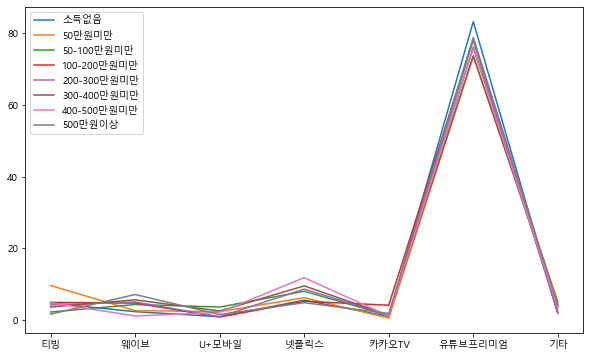

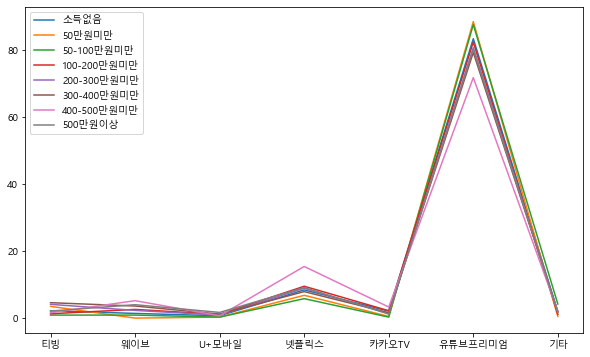

In [71]:
ott_s_income.T.loc["2020"].plot(figsize=(10,6))
ott_s_income.T.loc["2021"].plot(figsize=(10,6))

In [77]:
(ott_s_income["2021","유튜브프리미엄"]-ott_s_income["2020","유튜브프리미엄"])/ott_s_income["2020","유튜브프리미엄"] *100

# 전반적으로 이용 증가 
# 50만원미만 , 100만원 미만에서 증가가 두드러짐 -> 위의 나이대 이용률을 참고 하면 10~ 20대의 이용률은 떨어졌으나 50대~ 70대의 이용률이 늘어났다 
# 경제활동을 하지 않는 월소득 수준이 낮은 고령의 어르신들도 구독하기 시작했다. 라는 증거??

(ott_s_income["2021","넷플릭스"]-ott_s_income["2020","넷플릭스"])/ott_s_income["2020","넷플릭스"] *100

(ott_s_income["2021","티빙"]-ott_s_income["2020","티빙"])/ott_s_income["2020","티빙"] *100
# 전반적으로 감소

(ott_s_income["2021","웨이브"]-ott_s_income["2020","웨이브"])/ott_s_income["2020","웨이브"] *100
# 전반적으로 감소 

# 구독료가 다르기 때문에, 소득수준에 따른... 플랫폼 이용에 일정한 패턴이 있나 확인하고 싶었던 건데...
# 위자료로는 확인이 어려워 보임 이건 어떻게 확인할까?

# 구독료 조사 부터 해야지

소득없음           -39.130435
50만원미만        -100.000000
50-100만원미만     -79.069767
100-200만원미만    -44.680851
200-300만원미만    -54.000000
300-400만원미만    -35.714286
400-500만원미만    372.727273
500만원이상        -43.661972
dtype: float64

In [80]:
# 지역
ott_s_region = ott_s_copy.loc["지역"]

ott_s_region

2020                                      2021                         \
     티빙   웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타   티빙  웨이브 U+모바일  넷플릭스 카카오TV   
서울  4.4   6.2   2.9  12.3   2.2    69.6  2.3  5.5  4.1   2.3   8.8   2.1   
부산  0.2   0.7   0.7   5.2   1.1    90.4  1.8  0.6  0.4   0.2   5.3   0.5   
대구  3.9   3.1   1.2   9.5   1.8    76.5  3.9  1.9  5.4   0.4  16.2   6.2   
인천  1.9   3.5   0.3   5.1   0.8    86.5  2.0  1.9  2.9   0.3   7.9   0.7   
광주  5.6   0.3   0.0   4.6   1.5    86.4  1.6  1.1  0.3   0.0   5.3   1.1   
대전  1.3   4.0   0.0   6.3   3.0    82.9  2.4  0.0  0.1   0.0   9.4   1.2   
울산  0.2   1.8   1.0   1.2   0.4    92.2  3.3  1.6  0.3   0.4   8.5   0.0   
경기  9.5   4.9   1.5   6.6   1.8    73.1  2.5  4.2  3.0   1.1  11.4   2.6   
강원  0.3   1.6   1.5   6.8   0.0    86.9  3.0  0.6  2.7   0.2   9.1   0.6   
충북  2.2   1.2   0.1   7.7   2.0    84.6  2.3  0.4  0.7   0.0   6.4   0.9   
충남  3.2   7.1   0.8   1.9   1.7    84.2  1.2  0.0  0.2   0.7   7.6   1.1   
전북  2.2   0.4   0.3   9.6   2.0    85.2  0.3  3.4  1.6   0.1   2.9   3.2   
전남  4.7   0.7   0.0   3.6   0.8    83.3  6.8  0.5  0.1   0.4   0.5   0.9   
경북  0.8  11.0   1.1   4.4   0.8    79.0  2.9  4.0  1.6   1.1   3.7   0.8   
경남  0.4   1.5   0.5   4.3   1.8    89.1  2.5  0.9  0.3   0.2   9.1   0.1   
제주  0.3   2.9   1.4   3.7   0.0    84.6  7.1  1.0  3.9   0.0   6.0   0.2   
세종  4.0   0.0   0.0   7.8   0.8    87.3  0.0  0.0  0.0   0.0  23.9   0.0   

                 
   유튜브프리미엄   기타  
서울    75.6  1.7  
부산    92.8  0.2  
대구    66.3  3.6  
인천    84.2  2.2  
광주    91.9  0.2  
대전    88.6  0.7  
울산    88.0  1.2  
경기    74.8  2.8  
강원    83.2  3.6  
충북    91.6  0.1  
충남    90.4  0.0  
전북    88.4  0.5  
전남    94.9  2.8  
경북    86.6  2.2  
경남    88.4  1.0  
제주    85.8  3.2  
세종    76.1  0.0

In [82]:
# 지역별 이용률로 확인하고 싶었던 것은 수도권과 지방과의 차이가 있을까?

ott_s_region.loc["수도권"] =  ott_s_region.loc["서울"] + ott_s_region.loc["경기"]
ott_s_region.loc["충북/충남"] =  ott_s_region.loc["충북"] + ott_s_region.loc["충남"]
ott_s_region.loc["전북/전남"] =  ott_s_region.loc["전북"] + ott_s_region.loc["전남"]
ott_s_region.loc["경북/경남"] =  ott_s_region.loc["경북"] + ott_s_region.loc["경남"]

ott_s_region

C:\Users\user\AppData\Local\Temp\ipykernel_14896\3039897604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ott_s_region.loc["수도권"] =  ott_s_region.loc["서울"] + ott_s_region.loc["경기"]
C:\Users\user\AppData\Local\Temp\ipykernel_14896\3039897604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ott_s_region.loc["충북/충남"] =  ott_s_region.loc["충북"] + ott_s_region.loc["충남"]
C:\Users\user\AppData\Local\Temp\ipykernel_14896\3039897604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

2020                                      2021                         \
         티빙   웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타   티빙  웨이브 U+모바일  넷플릭스 카카오TV   
서울      4.4   6.2   2.9  12.3   2.2    69.6  2.3  5.5  4.1   2.3   8.8   2.1   
부산      0.2   0.7   0.7   5.2   1.1    90.4  1.8  0.6  0.4   0.2   5.3   0.5   
대구      3.9   3.1   1.2   9.5   1.8    76.5  3.9  1.9  5.4   0.4  16.2   6.2   
인천      1.9   3.5   0.3   5.1   0.8    86.5  2.0  1.9  2.9   0.3   7.9   0.7   
광주      5.6   0.3   0.0   4.6   1.5    86.4  1.6  1.1  0.3   0.0   5.3   1.1   
대전      1.3   4.0   0.0   6.3   3.0    82.9  2.4  0.0  0.1   0.0   9.4   1.2   
울산      0.2   1.8   1.0   1.2   0.4    92.2  3.3  1.6  0.3   0.4   8.5   0.0   
경기      9.5   4.9   1.5   6.6   1.8    73.1  2.5  4.2  3.0   1.1  11.4   2.6   
강원      0.3   1.6   1.5   6.8   0.0    86.9  3.0  0.6  2.7   0.2   9.1   0.6   
충북      2.2   1.2   0.1   7.7   2.0    84.6  2.3  0.4  0.7   0.0   6.4   0.9   
충남      3.2   7.1   0.8   1.9   1.7    84.2  1.2  0.0  0.2   0.7   7.6   1.1   
전북      2.2   0.4   0.3   9.6   2.0    85.2  0.3  3.4  1.6   0.1   2.9   3.2   
전남      4.7   0.7   0.0   3.6   0.8    83.3  6.8  0.5  0.1   0.4   0.5   0.9   
경북      0.8  11.0   1.1   4.4   0.8    79.0  2.9  4.0  1.6   1.1   3.7   0.8   
경남      0.4   1.5   0.5   4.3   1.8    89.1  2.5  0.9  0.3   0.2   9.1   0.1   
제주      0.3   2.9   1.4   3.7   0.0    84.6  7.1  1.0  3.9   0.0   6.0   0.2   
세종      4.0   0.0   0.0   7.8   0.8    87.3  0.0  0.0  0.0   0.0  23.9   0.0   
수도권    13.9  11.1   4.4  18.9   4.0   142.7  4.8  9.7  7.1   3.4  20.2   4.7   
충북/충남   5.4   8.3   0.9   9.6   3.7   168.8  3.5  0.4  0.9   0.7  14.0   2.0   
전북/전남   6.9   1.1   0.3  13.2   2.8   168.5  7.1  3.9  1.7   0.5   3.4   4.1   
경북/경남   1.2  12.5   1.6   8.7   2.6   168.1  5.4  4.9  1.9   1.3  12.8   0.9   

                    
      유튜브프리미엄   기타  
서울       75.6  1.7  
부산       92.8  0.2  
대구       66.3  3.6  
인천       84.2  2.2  
광주       91.9  0.2  
대전       88.6  0.7  
울산       88.0  1.2  
경기       74.8  2.8  
강원       83.2  3.6  
충북       91.6  0.1  
충남       90.4  0.0  
전북       88.4  0.5  
전남       94.9  2.8  
경북       86.6  2.2  
경남       88.4  1.0  
제주       85.8  3.2  
세종       76.1  0.0  
수도권     150.4  4.5  
충북/충남   182.0  0.1  
전북/전남   183.3  3.3  
경북/경남   175.0  3.2

In [85]:
#ott_s_region.drop("서울", axis = 0, inplace = True)
ott_s_region.drop("경기", axis = 0, inplace = True)

ott_s_region.drop("충북", axis = 0, inplace = True)
ott_s_region.drop("충남", axis = 0, inplace = True)

ott_s_region.drop("전북", axis = 0, inplace = True)
ott_s_region.drop("전남", axis = 0, inplace = True)

ott_s_region.drop("경북", axis = 0, inplace = True)
ott_s_region.drop("경남", axis = 0, inplace = True)

ott_s_region

C:\Users\user\AppData\Local\Temp\ipykernel_14896\471549824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ott_s_region.drop("경기", axis = 0, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_14896\471549824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ott_s_region.drop("충북", axis = 0, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_14896\471549824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ott_s_

2020                                      2021                         \
         티빙   웨이브 U+모바일  넷플릭스 카카오TV 유튜브프리미엄   기타   티빙  웨이브 U+모바일  넷플릭스 카카오TV   
부산      0.2   0.7   0.7   5.2   1.1    90.4  1.8  0.6  0.4   0.2   5.3   0.5   
대구      3.9   3.1   1.2   9.5   1.8    76.5  3.9  1.9  5.4   0.4  16.2   6.2   
인천      1.9   3.5   0.3   5.1   0.8    86.5  2.0  1.9  2.9   0.3   7.9   0.7   
광주      5.6   0.3   0.0   4.6   1.5    86.4  1.6  1.1  0.3   0.0   5.3   1.1   
대전      1.3   4.0   0.0   6.3   3.0    82.9  2.4  0.0  0.1   0.0   9.4   1.2   
울산      0.2   1.8   1.0   1.2   0.4    92.2  3.3  1.6  0.3   0.4   8.5   0.0   
강원      0.3   1.6   1.5   6.8   0.0    86.9  3.0  0.6  2.7   0.2   9.1   0.6   
제주      0.3   2.9   1.4   3.7   0.0    84.6  7.1  1.0  3.9   0.0   6.0   0.2   
세종      4.0   0.0   0.0   7.8   0.8    87.3  0.0  0.0  0.0   0.0  23.9   0.0   
수도권    13.9  11.1   4.4  18.9   4.0   142.7  4.8  9.7  7.1   3.4  20.2   4.7   
충북/충남   5.4   8.3   0.9   9.6   3.7   168.8  3.5  0.4  0.9   0.7  14.0   2.0   
전북/전남   6.9   1.1   0.3  13.2   2.8   168.5  7.1  3.9  1.7   0.5   3.4   4.1   
경북/경남   1.2  12.5   1.6   8.7   2.6   168.1  5.4  4.9  1.9   1.3  12.8   0.9   

                    
      유튜브프리미엄   기타  
부산       92.8  0.2  
대구       66.3  3.6  
인천       84.2  2.2  
광주       91.9  0.2  
대전       88.6  0.7  
울산       88.0  1.2  
강원       83.2  3.6  
제주       85.8  3.2  
세종       76.1  0.0  
수도권     150.4  4.5  
충북/충남   182.0  0.1  
전북/전남   183.3  3.3  
경북/경남   175.0  3.2

<AxesSubplot:>

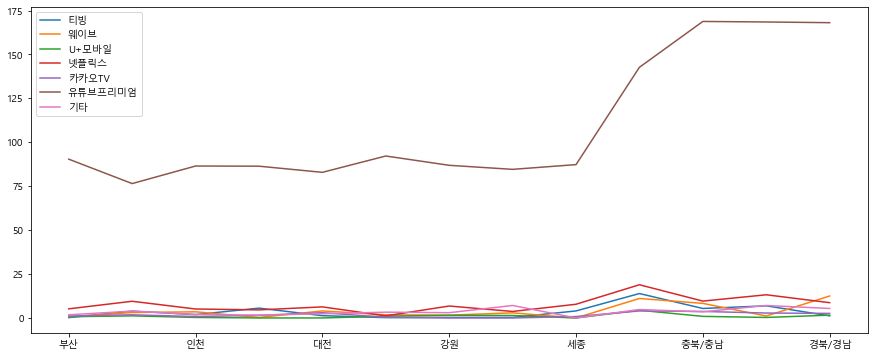

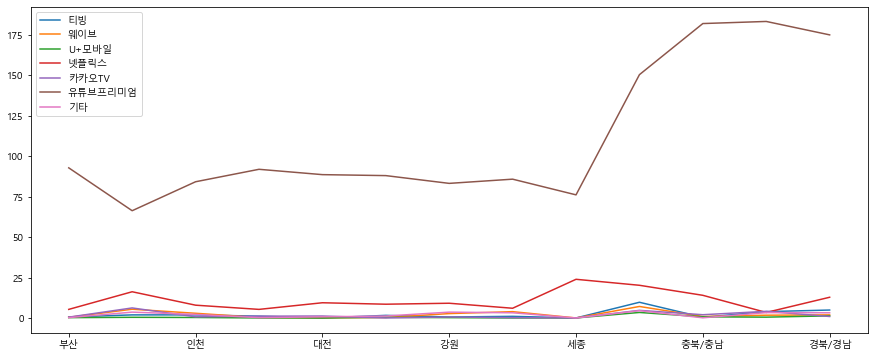

In [89]:
ott_s_region["2020"].plot(figsize=(15,6))
ott_s_region["2021"].plot(figsize=(15,6))

In [94]:
# 가구원 수
ott_s_family = ott_s_copy.loc["가구원수1"]
ott_s_family

2020                                    2021                         \
         티빙  웨이브 U+모바일 넷플릭스 카카오TV 유튜브프리미엄   기타   티빙  웨이브 U+모바일  넷플릭스 카카오TV   
1인가구    1.5  8.4   0.8  9.6   1.6    77.2  0.8  6.0  4.9   1.0  10.8   2.3   
2인가구    4.9  3.6   0.6  6.5   2.5    79.7  2.2  2.9  1.4   1.1   6.7   0.9   
3인이상가구  4.7  3.4   1.6  6.9   1.4    79.2  2.8  2.4  2.2   0.8   9.2   2.0   

                     
       유튜브프리미엄   기타  
1인가구      74.0  1.0  
2인가구      86.1  1.0  
3인이상가구    81.1  2.2

<AxesSubplot:>

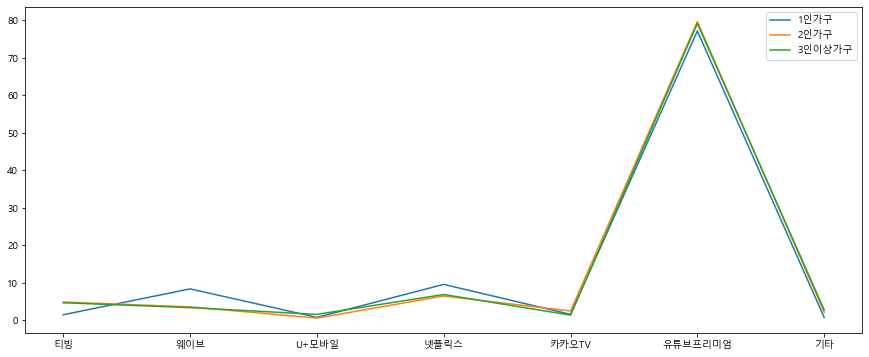

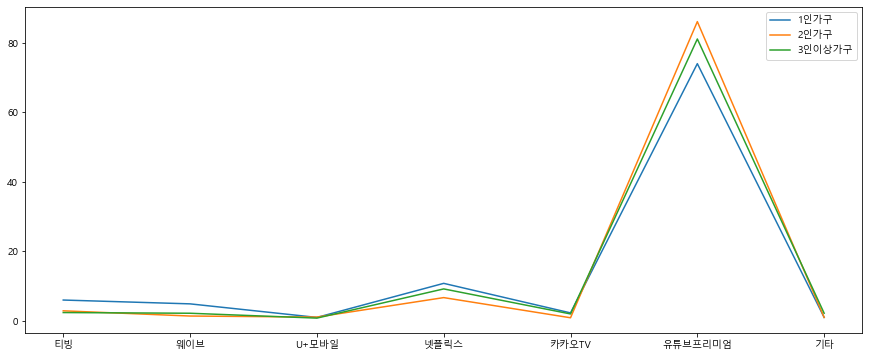

In [92]:
ott_s_family["2020"].T.plot(figsize=(15,6))
ott_s_family["2021"].T.plot(figsize=(15,6))

## 2. 가장 많이 이용하는 ott 서비스 이용 매체 1순위 

### 성별/나이별/소득별/지역/가구원수1

### 1)  데이터 전처리

In [15]:
# 엑셀 파일 불러오기

ott_m = pd.read_excel("data/가장_많이_이용하는_OTT_서비스의_주_이용_매체_1순위.xlsx",  header=[0,1], index_col=[0,1])
ott_m

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


구분별(2)               2020                                              \
구분별(2)            사례수 (명) 스마트폰 (%) 태블릿PC (%) 데스크톱 컴퓨터 (%) 노트북 컴퓨터 (%)   
전체    소계           7434.0     96.4       0.9          1.0         0.8   
성별    남            3872.0     96.0       0.9          1.3         0.9   
      여            3562.0     96.9       0.9          0.6         0.7   
연령    만10대미만        173.0     85.7       9.0          0.0         2.6   
      만10-19세       825.0     93.3       1.4          2.0         1.5   
      만20-29세      1378.0     94.9       1.9          1.2         1.9   
      만30-39세      1420.0     98.8       0.1          1.0         0.0   
      만40-49세      1481.0     97.6       0.3          0.5         0.4   
      만50-59세      1373.0     97.1       0.2          1.0         0.4   
      만60-69세       666.0     97.3       0.7          0.3         0.5   
      만70세이상        119.0     98.2       0.0          1.1         0.0   
월평균소득 소득없음         2477.0     94.7       1.6          1.1         1.2   
      50만원미만        138.0     96.2       2.2          0.3         0.9   
      50-100만원미만    222.0     98.4       0.0          0.3         1.4   
      100-200만원미만  1120.0     97.8       0.8          0.5         0.1   
      200-300만원미만  1961.0     97.4       0.4          1.0         0.6   
      300-400만원미만  1026.0     97.7       0.3          1.0         0.4   
      400-500만원미만   266.0     95.0       1.1          1.3         0.6   
      500만원이상       224.0     94.7       0.0          1.3         2.7   
지역    서울           1482.0     96.4       0.9          0.7         0.9   
      부산            524.0     99.3       0.0          0.0         0.3   
      대구            335.0     89.3       4.0          2.7         2.4   
      인천            452.0     96.2       1.6          0.7         0.7   
      광주            248.0     97.9       0.6          0.9         0.5   
      대전            213.0     99.5       0.5          0.0         0.0   
      울산            176.0     97.5       0.0          2.0         0.1   
      경기           1907.0     95.6       0.8          1.5         0.7   
      강원            181.0     87.9       4.7          0.3         3.8   
      충북            264.0     98.4       0.0          1.2         0.4   
      충남            265.0     97.9       0.0          1.5         0.0   
      전북            262.0     99.2       0.0          0.3         0.0   
      전남            245.0    100.0       0.0          0.0         0.0   
      경북            291.0     93.0       1.6          1.8         2.7   
      경남            427.0     99.8       0.0          0.0         0.0   
      제주             83.0     95.6       0.3          1.7         1.2   
      세종             79.0    100.0       0.0          0.0         0.0   
가구원수1 1인가구          822.0     98.6       0.0          0.6         0.8   
      2인가구         1586.0     97.9       0.6          0.3         0.8   
      3인이상가구       5027.0     95.6       1.1          1.2         0.8   

구분별(2)                          2021                                  \
구분별(2)            TV 수상기 (%) 사례수 (명) 스마트폰 (%) 태블릿PC (%) 데스크톱 컴퓨터 (%)   
전체    소계                 0.9  8293.7     92.8       2.6          0.8   
성별    남                  0.9  4283.5     93.8       2.3          1.1   
      여                  1.0  4010.2     91.8       3.0          0.5   
연령    만10대미만             2.6   174.5     61.5      28.8          0.5   
      만10-19세            1.7   880.1     87.1       5.2          2.7   
      만20-29세            0.1  1381.4     90.0       4.6          1.1   
      만30-39세            0.2  1390.1     95.4       2.5          0.1   
      만40-49세            1.3  1585.9     93.3       0.9          0.9   
      만50-59세            1.4  1580.6     95.4       0.4          0.8   
      만60-69세            1.1  1025.7     97.6       0.3          0.2   
      만70세이상             0.7   275.5     97.3       0.1          0.3   
월평균소득 소득없음               1.4  2631.2     89.0       4.9          1.4  

In [16]:
# 컬럼 명 변경

ott_m.columns =[["2020","2020","2020","2020","2020","2020", "2021","2021","2021","2021","2021","2021"],
              ["명 수","스마트폰", "태블릿PC", "데스크톱컴퓨터", "노트북컴퓨터", "TV", "명 수","스마트폰", "태블릿PC", "데스크톱컴퓨터", "노트북컴퓨터", "TV"]]

In [17]:
ott_m.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39 entries, ('전체', '소계') to ('가구원수1', '3인이상가구')
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (2020, 명 수)      39 non-null     float64
 1   (2020, 스마트폰)     39 non-null     float64
 2   (2020, 태블릿PC)    39 non-null     float64
 3   (2020, 데스크톱컴퓨터)  39 non-null     float64
 4   (2020, 노트북컴퓨터)   39 non-null     float64
 5   (2020, TV)       39 non-null     float64
 6   (2021, 명 수)      39 non-null     float64
 7   (2021, 스마트폰)     39 non-null     float64
 8   (2021, 태블릿PC)    39 non-null     float64
 9   (2021, 데스크톱컴퓨터)  39 non-null     float64
 10  (2021, 노트북컴퓨터)   39 non-null     float64
 11  (2021, TV)       39 non-null     float64
dtypes: float64(12)
memory usage: 5.3+ KB


In [21]:
################################################################################## 

# 명 수로 변환 하지 않고 그냥 원본 데이터 %로 사용 하기로 했다.
################################################################################## 

#  인원수로 변환 - "명 수" 를 제외한 모든 컬럼은 % 이므로 인원수로 변환 시켜 준다.

m_20=ott_m["2020"]

m_20["스마트폰"]=round(m_20["스마트폰"]/100 *m_20["명 수"])
m_20["태블릿PC"]=round(m_20["태블릿PC"]/100 *m_20["명 수"])
m_20["데스크톱컴퓨터"]=round(m_20["데스크톱컴퓨터"]/100 *m_20["명 수"])
m_20["노트북컴퓨터"]=round(m_20["노트북컴퓨터"]/100 *m_20["명 수"])
m_20["TV"]=round(m_20["TV"]/100 *m_20["명 수"])

m_20

m_21=ott_m["2021"]

m_21["스마트폰"]=round(m_21["스마트폰"]/100 *m_21["명 수"])
m_21["태블릿PC"]=round(m_21["태블릿PC"]/100 *m_21["명 수"])
m_21["데스크톱컴퓨터"]=round(m_21["데스크톱컴퓨터"]/100 *m_21["명 수"])
m_21["노트북컴퓨터"]=round(m_21["노트북컴퓨터"]/100 *m_21["명 수"])
m_21["TV"]=round(m_21["TV"]/100 *m_21["명 수"])

m_21



C:\Users\LG\AppData\Local\Temp\ipykernel_7808\1981912577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_20["스마트폰"]=round(m_20["스마트폰"]/100 *m_20["명 수"])
C:\Users\LG\AppData\Local\Temp\ipykernel_7808\1981912577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_20["태블릿PC"]=round(m_20["태블릿PC"]/100 *m_20["명 수"])
C:\Users\LG\AppData\Local\Temp\ipykernel_7808\1981912577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

명 수    스마트폰  태블릿PC  데스크톱컴퓨터  노트북컴퓨터    TV
전체    소계           7434  7166.0   67.0     74.0    59.0  67.0
성별    남            3872  3717.0   35.0     50.0    35.0  35.0
      여            3562  3452.0   32.0     21.0    25.0  36.0
연령    만10대미만        173   148.0   16.0      0.0     4.0   4.0
      만10-19세       825   770.0   12.0     16.0    12.0  14.0
      만20-29세      1378  1308.0   26.0     17.0    26.0   1.0
      만30-39세      1420  1403.0    1.0     14.0     0.0   3.0
      만40-49세      1481  1445.0    4.0      7.0     6.0  19.0
      만50-59세      1373  1333.0    3.0     14.0     5.0  19.0
      만60-69세       666   648.0    5.0      2.0     3.0   7.0
      만70세이상        119   117.0    0.0      1.0     0.0   1.0
월평균소득 소득없음         2477  2346.0   40.0     27.0    30.0  35.0
      50만원미만        138   133.0    3.0      0.0     1.0   0.0
      50-100만원미만    222   218.0    0.0      1.0     3.0   0.0
      100-200만원미만  1120  1095.0    9.0      6.0     1.0   8.0
      200-300만원미만  1961  1910.0    8.0     20.0    12.0  12.0
      300-400만원미만  1026  1002.0    3.0     10.0     4.0   5.0
      400-500만원미만   266   253.0    3.0      3.0     2.0   5.0
      500만원이상       224   212.0    0.0      3.0     6.0   3.0
지역    서울           1482  1429.0   13.0     10.0    13.0  16.0
      부산            524   520.0    0.0      0.0     2.0   2.0
      대구            335   299.0   13.0      9.0     8.0   5.0
      인천            452   435.0    7.0      3.0     3.0   4.0
      광주            248   243.0    1.0      2.0     1.0   0.0
      대전            213   212.0    1.0      0.0     0.0   0.0
      울산            176   172.0    0.0      4.0     0.0   1.0
      경기           1907  1823.0   15.0     29.0    13.0  27.0
      강원            181   159.0    9.0      1.0     7.0   6.0
      충북            264   260.0    0.0      3.0     1.0   0.0
      충남            265   259.0    0.0      4.0     0.0   1.0
      전북            262   260.0    0.0      1.0     0.0   1.0
      전남            245   245.0    0.0      0.0     0.0   0.0
      경북            291   271.0    5.0      5.0     8.0   3.0
      경남            427   426.0    0.0      0.0     0.0   1.0
      제주             83    79.0    0.0      1.0     1.0   1.0
      세종             79    79.0    0.0      0.0     0.0   0.0
가구원수1 1인가구          822   810.0    0.0      5.0     7.0   0.0
      2인가구         1586  1553.0   10.0      5.0    13.0   6.0
      3인이상가구       5027  4806.0   55.0     60.0    40.0  60.0

In [23]:
################################################################################## 

# 노트북과 데스크탑 컴퓨터에 대한 컬럼은 전처리 중에 합치려고 했지만
# 회의 후 노트북은 데스크탑 컴퓨터와 달리 휴대성이라는 특성이 있기 때문에 데스크탑 컴퓨터와 합치지 않기로 했다.

########################

# 데스크톱 컴퓨터와 노트북 컬럼 합치기 새로운 컬럼으로 합치기 및 기존 컬럼 지우기

ott_2020["컴퓨터"] = ott_2020["데스크톱컴퓨터"] + ott_2020["노트북컴퓨터"]
#del ott_2020["데스크톱컴퓨터"]
#del ott_2020["노트북컴퓨터"] 

ott_2021["컴퓨터"] = ott_2021["데스크톱컴퓨터"] + ott_2021["노트북컴퓨터"]
#del ott_2021["데스크톱컴퓨터"]
#del ott_2021["노트북컴퓨터"] 

########################

# 노트북과 데스크탑 컴퓨터에 대한 컬럼은 전처리 중에 합치려고 했지만
# 회의 후 노트북은 데스크탑 컴퓨터와 달리 휴대성이라는 특성이 있기 때문에 데스크탑 컴퓨터와 합치지 않기로 했다.


NameError: name 'ott_2020' is not defined

In [18]:
# 중간 저장
ott_m.to_excel("data/ott_medium_20_21.xlsx")

In [19]:
ott_m_copy = pd.read_excel("data/ott_medium_20_21.xlsx",  header=[0,1], index_col=[0,1])
ott_m_copy

2020                                     2021              \
                    명 수   스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV     명 수  스마트폰 태블릿PC   
전체    소계           7434   96.4   0.9     1.0    0.8  0.9  8293.7  92.8   2.6   
성별    남            3872   96.0   0.9     1.3    0.9  0.9  4283.5  93.8   2.3   
      여            3562   96.9   0.9     0.6    0.7  1.0  4010.2  91.8   3.0   
연령    만10대미만        173   85.7   9.0     0.0    2.6  2.6   174.5  61.5  28.8   
      만10-19세       825   93.3   1.4     2.0    1.5  1.7   880.1  87.1   5.2   
      만20-29세      1378   94.9   1.9     1.2    1.9  0.1  1381.4  90.0   4.6   
      만30-39세      1420   98.8   0.1     1.0    0.0  0.2  1390.1  95.4   2.5   
      만40-49세      1481   97.6   0.3     0.5    0.4  1.3  1585.9  93.3   0.9   
      만50-59세      1373   97.1   0.2     1.0    0.4  1.4  1580.6  95.4   0.4   
      만60-69세       666   97.3   0.7     0.3    0.5  1.1  1025.7  97.6   0.3   
      만70세이상        119   98.2   0.0     1.1    0.0  0.7   275.5  97.3   0.1   
월평균소득 소득없음         2477   94.7   1.6     1.1    1.2  1.4  2631.2  89.0   4.9   
      50만원미만        138   96.2   2.2     0.3    0.9  0.3   175.9  94.1   3.0   
      50-100만원미만    222   98.4   0.0     0.3    1.4  0.0   317.8  94.9   1.2   
      100-200만원미만  1120   97.8   0.8     0.5    0.1  0.7  1094.2  95.4   1.3   
      200-300만원미만  1961   97.4   0.4     1.0    0.6  0.6  2118.0  94.9   1.1   
      300-400만원미만  1026   97.7   0.3     1.0    0.4  0.5  1326.0  95.2   2.3   
      400-500만원미만   266   95.0   1.1     1.3    0.6  1.9   358.2  90.9   2.4   
      500만원이상       224   94.7   0.0     1.3    2.7  1.3   272.5  90.6   1.5   
지역    서울           1482   96.4   0.9     0.7    0.9  1.1  1626.1  93.3   2.4   
      부산            524   99.3   0.0     0.0    0.3  0.4   555.7  99.2   0.0   
      대구            335   89.3   4.0     2.7    2.4  1.5   358.0  84.2   7.6   
      인천            452   96.2   1.6     0.7    0.7  0.8   499.5  91.3   2.9   
      광주            248   97.9   0.6     0.9    0.5  0.1   263.0  95.1   1.6   
      대전            213   99.5   0.5     0.0    0.0  0.0   219.8  92.5   0.4   
      울산            176   97.5   0.0     2.0    0.1  0.4   187.4  98.6   0.3   
      경기           1907   95.6   0.8     1.5    0.7  1.4  2226.8  91.4   3.5   
      강원            181   87.9   4.7     0.3    3.8  3.3   207.4  91.3   1.9   
      충북            264   98.4   0.0     1.2    0.4  0.0   279.8  86.8   7.4   
      충남            265   97.9   0.0     1.5    0.0  0.5   305.8  98.4   0.3   
      전북            262   99.2   0.0     0.3    0.0  0.5   292.8  94.5   0.0   
      전남            245  100.0   0.0     0.0    0.0  0.0   279.7  91.9   4.6   
      경북            291   93.0   1.6     1.8    2.7  1.0   318.2  94.4   2.3   
      경남            427   99.8   0.0     0.0    0.0  0.2   501.1  97.8   0.0   
      제주             83   95.6   0.3     1.7    1.2  1.3    84.5  93.6   2.8   
      세종             79  100.0   0.0     0.0    0.0  0.0    88.1  70.2   5.5   
가구원수1 1인가구          822   98.6   0.0     0.6    0.8  0.0   951.3  94.4   1.2   
      2인가구         1586   97.9   0.6     0.3    0.8  0.4  1947.3  96.2   0.7   
      3인이상가구       5027   95.6   1.1     1.2    0.8  1.2  5395.1  91.3   3.6   

                                       
                  데스크톱컴퓨터 노트북컴퓨터   TV  
전체    소계              0.8    1.2  2.5  
성별    남               1.1    1.0  1.8  
      여               0.5    1.4  3.3  
연령    만10대미만          0.5    0.9  8.4  
      만10-19세         2.7    3.5  1.5  
      만20-29세         1.1    3.0  1.4  
      만30-39세         0.1    0.4  1.6  
      만40-49세         0.9    0.5  4.5  
      만50-59세         0.8    0.6  2.9  
      만60-69세         0.2    0.4  1.5  
      만70세이상          0.3    0.0  2.2  
월평균소득 소득없음            1.4    1.9  2.9  
      50만원미만          0.4    0.4  2.0  
      50-100만원미만      2.8    0.0  1.1  
      100-200만원미만     0.3    0.4  2.5  
      200-300만원미만     0.3    1.3  2.3  
      300-400만원미만 

In [177]:
del ott_m_copy ["2020","명 수"]
del ott_m_copy ["2021","명 수"]

### 2)  EDA
구분별 데이터 탐색

In [169]:
ott_m_sex=ott_m_copy.loc["성별"]
ott_m_sex

2020                                    2021                             \
    명 수  스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV     명 수  스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   
남  3872  96.0   0.9     1.3    0.9  0.9  4283.5  93.8   2.3     1.1    1.0   
여  3562  96.9   0.9     0.6    0.7  1.0  4010.2  91.8   3.0     0.5    1.4   

        
    TV  
남  1.8  
여  3.3

In [170]:
ott_m_age=ott_m_copy.loc["연령"]
ott_m_age

2020                                    2021                      \
          명 수  스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV     명 수  스마트폰 태블릿PC 데스크톱컴퓨터   
만10대미만    173  85.7   9.0     0.0    2.6  2.6   174.5  61.5  28.8     0.5   
만10-19세   825  93.3   1.4     2.0    1.5  1.7   880.1  87.1   5.2     2.7   
만20-29세  1378  94.9   1.9     1.2    1.9  0.1  1381.4  90.0   4.6     1.1   
만30-39세  1420  98.8   0.1     1.0    0.0  0.2  1390.1  95.4   2.5     0.1   
만40-49세  1481  97.6   0.3     0.5    0.4  1.3  1585.9  93.3   0.9     0.9   
만50-59세  1373  97.1   0.2     1.0    0.4  1.4  1580.6  95.4   0.4     0.8   
만60-69세   666  97.3   0.7     0.3    0.5  1.1  1025.7  97.6   0.3     0.2   
만70세이상    119  98.2   0.0     1.1    0.0  0.7   275.5  97.3   0.1     0.3   

                     
        노트북컴퓨터   TV  
만10대미만     0.9  8.4  
만10-19세    3.5  1.5  
만20-29세    3.0  1.4  
만30-39세    0.4  1.6  
만40-49세    0.5  4.5  
만50-59세    0.6  2.9  
만60-69세    0.4  1.5  
만70세이상     0.0  2.2

In [178]:
ott_m_region=ott_m_copy.loc["지역"]
ott_m_region

2020                            2021                          
     스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV  스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV
서울   96.4   0.9     0.7    0.9  1.1  93.3   2.4     0.4    0.9  3.0
부산   99.3   0.0     0.0    0.3  0.4  99.2   0.0     0.3    0.0  0.4
대구   89.3   4.0     2.7    2.4  1.5  84.2   7.6     1.4    2.9  3.9
인천   96.2   1.6     0.7    0.7  0.8  91.3   2.9     1.5    2.5  1.8
광주   97.9   0.6     0.9    0.5  0.1  95.1   1.6     0.0    0.0  3.2
대전   99.5   0.5     0.0    0.0  0.0  92.5   0.4     0.2    4.1  2.8
울산   97.5   0.0     2.0    0.1  0.4  98.6   0.3     0.1    0.0  1.1
경기   95.6   0.8     1.5    0.7  1.4  91.4   3.5     1.4    1.0  2.7
강원   87.9   4.7     0.3    3.8  3.3  91.3   1.9     0.7    0.3  5.8
충북   98.4   0.0     1.2    0.4  0.0  86.8   7.4     0.0    5.8  0.0
충남   97.9   0.0     1.5    0.0  0.5  98.4   0.3     0.0    0.3  0.9
전북   99.2   0.0     0.3    0.0  0.5  94.5   0.0     0.0    0.8  4.7
전남  100.0   0.0     0.0    0.0  0.0  91.9   4.6     0.6    0.0  2.9
경북   93.0   1.6     1.8    2.7  1.0  94.4   2.3     1.0    0.3  2.0
경남   99.8   0.0     0.0    0.0  0.2  97.8   0.0     0.0    0.0  2.2
제주   95.6   0.3     1.7    1.2  1.3  93.6   2.8     1.6    1.2  0.8
세종  100.0   0.0     0.0    0.0  0.0  70.2   5.5    12.0    8.8  3.6

In [182]:
ott_m_family=ott_m_copy.loc["가구원수1"]
ott_m_family

2020                            2021                          
        스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV  스마트폰 태블릿PC 데스크톱컴퓨터 노트북컴퓨터   TV
1인가구    98.6   0.0     0.6    0.8  0.0  94.4   1.2     0.6    1.0  2.9
2인가구    97.9   0.6     0.3    0.8  0.4  96.2   0.7     0.4    0.7  2.1
3인이상가구  95.6   1.1     1.2    0.8  1.2  91.3   3.6     1.1    1.4  2.6

<AxesSubplot:>

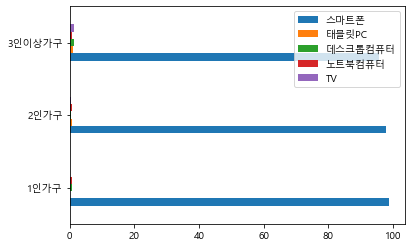

In [184]:
ott_m_family["2020"].plot.barh()

## 지역별 영화관 수가 ott 이용률 또는 이용빈도에 영향을 줄까? 관계가 있을까?

In [30]:
# 이용 경험 

ott_ex=pd.read_excel("data/최근_3개월_OTT서비스_이용_경험여부.xlsx", header=[0,1], index_col=[0,1])

ott_ex.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39 entries, ('전체', '소계') to ('가구원수1', '3인이상가구')
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (2019, 사례수 (명))      39 non-null     float64
 1   (2019, 이용경험 있음 (%))  39 non-null     float64
 2   (2019, 이용경험 없음 (%))  39 non-null     float64
 3   (2020, 사례수 (명))      39 non-null     float64
 4   (2020, 이용경험 있음 (%))  39 non-null     float64
 5   (2020, 이용경험 없음 (%))  39 non-null     float64
 6   (2021, 사례수 (명))      39 non-null     float64
 7   (2021, 이용경험 있음 (%))  39 non-null     float64
 8   (2021, 이용경험 없음 (%))  39 non-null     float64
dtypes: float64(9)
memory usage: 4.4+ KB


C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
ott_ex.columns =[["2019","2019","2019","2020","2020","2020","2021","2021","2021"],
              ["사례수","이용경험있음", "이용경험없음", "사례수", "이용경험있음", "이용경험없음", "사례수", "이용경험있음", "이용경험없음"]]

In [32]:
ott_ex

2019                   2020                   2021  \
                       사례수 이용경험있음 이용경험없음      사례수 이용경험있음 이용경험없음      사례수   
전체    소계           10864.0   41.0   59.0  10302.0   72.2   27.8  10154.0   
성별    남             5401.1   44.0   56.0   5146.0   75.2   24.8   5061.2   
      여             5462.9   38.1   61.9   5156.0   69.1   30.9   5092.8   
연령    만10대미만         346.5   23.3   76.7    258.0   67.1   32.9    226.1   
      만10-19세       1036.2   48.4   51.6    984.0   83.8   16.2    962.7   
      만20-29세       1564.4   65.4   34.6   1440.0   95.7    4.3   1411.4   
      만30-39세       1578.3   62.0   38.0   1509.0   94.1    5.9   1441.2   
      만40-49세       1838.3   47.2   52.8   1745.0   84.9   15.1   1694.0   
      만50-59세       1924.9   35.5   64.5   1827.0   75.2   24.8   1788.0   
      만60-69세       1383.8   19.8   80.2   1377.0   48.3   51.7   1453.5   
      만70세이상        1191.6    4.1   95.9   1162.0   10.3   89.7   1177.2   
월평균소득 소득없음          3787.8   40.6   59.4   3432.0   72.2   27.8   3215.6   
      50만원미만         636.5   16.6   83.4    536.0   25.8   74.2    521.6   
      50-100만원미만     564.3   24.2   75.8    553.0   40.1   59.9    574.2   
      100-200만원미만   2035.8   39.3   60.7   1661.0   67.4   32.6   1428.7   
      200-300만원미만   2260.2   47.8   52.2   2373.0   82.6   17.4   2340.9   
      300-400만원미만    993.0   50.8   49.2   1155.0   88.9   11.1   1386.7   
      400-500만원미만    319.1   54.3   45.7    327.0   81.4   18.6    386.4   
      500만원이상        267.2   44.1   55.9    267.0   84.2   15.8    299.8   
지역    서울            2004.6   34.9   65.1   1918.0   77.3   22.7   1870.3   
      부산             715.3   55.0   45.0    675.0   77.6   22.4    656.7   
      대구             520.1   33.5   66.5    490.0   68.4   31.6    483.0   
      인천             611.1   40.1   59.9    595.0   76.0   24.0    587.6   
      광주             321.1   34.2   65.8    302.0   82.0   18.0    296.2   
      대전             316.2   72.8   27.2    260.0   81.8   18.2    245.9   
      울산             234.5   64.2   35.8    226.0   77.8   22.2    222.0   
      경기            2805.1   37.1   62.9   2680.0   71.1   28.9   2683.6   
      강원             320.1   32.8   67.2    305.0   59.4   40.6    300.5   
      충북             348.7   71.6   28.4    332.0   79.6   20.4    326.9   
      충남             460.5   67.7   32.3    389.0   68.2   31.8    381.3   
      전북             388.5   35.9   64.1    366.0   71.6   28.4    354.6   
      전남             374.6   12.0   88.0    355.0   68.9   31.1    349.3   
      경북             561.1   24.1   75.9    534.0   54.5   45.5    512.1   
      경남             683.1   47.3   52.7    657.0   64.9   35.1    658.2   
      제주             137.4   42.9   57.1    131.0   63.9   36.1    130.7   
      세종              61.9   73.8   26.2     86.0   91.5    8.5     95.0   
가구원수1 1인가구          1240.7   35.6   64.4   1338.0   61.4   38.6   1335.9   
      2인가구          2715.6   33.9   66.1   2678.0   59.2   40.8   2688.5   
      3인이상가구        6907.7   44.8   55.2   6286.0   80.0   20.0   6129.5   

                                 
                  이용경험있음 이용경험없음  
전체    소계            81.7   18.3  
성별    남             84.6   15.4  
      여             78.7   21.3  
연령    만10대미만        77.2   22.8  
      만10-19세       91.4    8.6  
      만20-29세       97.9    2.1  
      만30-39세       96.5    3.5  
      만40-49세       93.6    6.4  
      만50-59세       88.4   11.6  
      만60-69세       70.6   29.4  
      만70세이상        23.4   76.6  
월평균소득 소득없음          81.8   18.2  
      50만원미만        33.7   66.3  
      50-100만원미만    55.3   44.7  
      100-200만원미만   76.6   23.4  
      200-300만원미만   90.5    9.5  
      300-400만원미만   95.6    4.4  
      400-500만원미만   92.7    7.3  
      500만원이상       90.9    9.1  
지역    서울            86.9   13.1  
      부산            84.6   15.4  
      대구            74.1   25.9  
      인천            85.0   15.0  
      광주            88.8   11.2  
      대전            8

In [33]:
# 사례수 지우기

del ott_ex["2019","사례수"]
del ott_ex["2020","사례수"]
del ott_ex["2021","사례수"]

ott_ex

2019          2020          2021       
                  이용경험있음 이용경험없음 이용경험있음 이용경험없음 이용경험있음 이용경험없음
전체    소계            41.0   59.0   72.2   27.8   81.7   18.3
성별    남             44.0   56.0   75.2   24.8   84.6   15.4
      여             38.1   61.9   69.1   30.9   78.7   21.3
연령    만10대미만        23.3   76.7   67.1   32.9   77.2   22.8
      만10-19세       48.4   51.6   83.8   16.2   91.4    8.6
      만20-29세       65.4   34.6   95.7    4.3   97.9    2.1
      만30-39세       62.0   38.0   94.1    5.9   96.5    3.5
      만40-49세       47.2   52.8   84.9   15.1   93.6    6.4
      만50-59세       35.5   64.5   75.2   24.8   88.4   11.6
      만60-69세       19.8   80.2   48.3   51.7   70.6   29.4
      만70세이상         4.1   95.9   10.3   89.7   23.4   76.6
월평균소득 소득없음          40.6   59.4   72.2   27.8   81.8   18.2
      50만원미만        16.6   83.4   25.8   74.2   33.7   66.3
      50-100만원미만    24.2   75.8   40.1   59.9   55.3   44.7
      100-200만원미만   39.3   60.7   67.4   32.6   76.6   23.4
      200-300만원미만   47.8   52.2   82.6   17.4   90.5    9.5
      300-400만원미만   50.8   49.2   88.9   11.1   95.6    4.4
      400-500만원미만   54.3   45.7   81.4   18.6   92.7    7.3
      500만원이상       44.1   55.9   84.2   15.8   90.9    9.1
지역    서울            34.9   65.1   77.3   22.7   86.9   13.1
      부산            55.0   45.0   77.6   22.4   84.6   15.4
      대구            33.5   66.5   68.4   31.6   74.1   25.9
      인천            40.1   59.9   76.0   24.0   85.0   15.0
      광주            34.2   65.8   82.0   18.0   88.8   11.2
      대전            72.8   27.2   81.8   18.2   89.4   10.6
      울산            64.2   35.8   77.8   22.2   84.4   15.6
      경기            37.1   62.9   71.1   28.9   83.0   17.0
      강원            32.8   67.2   59.4   40.6   69.0   31.0
      충북            71.6   28.4   79.6   20.4   85.6   14.4
      충남            67.7   32.3   68.2   31.8   80.2   19.8
      전북            35.9   64.1   71.6   28.4   82.6   17.4
      전남            12.0   88.0   68.9   31.1   80.1   19.9
      경북            24.1   75.9   54.5   45.5   62.1   37.9
      경남            47.3   52.7   64.9   35.1   76.1   23.9
      제주            42.9   57.1   63.9   36.1   64.7   35.3
      세종            73.8   26.2   91.5    8.5   92.8    7.2
가구원수1 1인가구          35.6   64.4   61.4   38.6   71.2   28.8
      2인가구          33.9   66.1   59.2   40.8   72.4   27.6
      3인이상가구        44.8   55.2   80.0   20.0   88.0   12.0

In [34]:
#중간_저장
ott_ex.to_excel("data/ott_experience_19_21.xlsx")


In [285]:
ott_ex = pd.read_excel("data/ott_experience_19_21.xlsx",  header=[0,1], index_col=[0,1])
ott_ex

2019          2020          2021       
                  이용경험있음 이용경험없음 이용경험있음 이용경험없음 이용경험있음 이용경험없음
전체    소계            41.0   59.0   72.2   27.8   81.7   18.3
성별    남             44.0   56.0   75.2   24.8   84.6   15.4
      여             38.1   61.9   69.1   30.9   78.7   21.3
연령    만10대미만        23.3   76.7   67.1   32.9   77.2   22.8
      만10-19세       48.4   51.6   83.8   16.2   91.4    8.6
      만20-29세       65.4   34.6   95.7    4.3   97.9    2.1
      만30-39세       62.0   38.0   94.1    5.9   96.5    3.5
      만40-49세       47.2   52.8   84.9   15.1   93.6    6.4
      만50-59세       35.5   64.5   75.2   24.8   88.4   11.6
      만60-69세       19.8   80.2   48.3   51.7   70.6   29.4
      만70세이상         4.1   95.9   10.3   89.7   23.4   76.6
월평균소득 소득없음          40.6   59.4   72.2   27.8   81.8   18.2
      50만원미만        16.6   83.4   25.8   74.2   33.7   66.3
      50-100만원미만    24.2   75.8   40.1   59.9   55.3   44.7
      100-200만원미만   39.3   60.7   67.4   32.6   76.6   23.4
      200-300만원미만   47.8   52.2   82.6   17.4   90.5    9.5
      300-400만원미만   50.8   49.2   88.9   11.1   95.6    4.4
      400-500만원미만   54.3   45.7   81.4   18.6   92.7    7.3
      500만원이상       44.1   55.9   84.2   15.8   90.9    9.1
지역    서울            34.9   65.1   77.3   22.7   86.9   13.1
      부산            55.0   45.0   77.6   22.4   84.6   15.4
      대구            33.5   66.5   68.4   31.6   74.1   25.9
      인천            40.1   59.9   76.0   24.0   85.0   15.0
      광주            34.2   65.8   82.0   18.0   88.8   11.2
      대전            72.8   27.2   81.8   18.2   89.4   10.6
      울산            64.2   35.8   77.8   22.2   84.4   15.6
      경기            37.1   62.9   71.1   28.9   83.0   17.0
      강원            32.8   67.2   59.4   40.6   69.0   31.0
      충북            71.6   28.4   79.6   20.4   85.6   14.4
      충남            67.7   32.3   68.2   31.8   80.2   19.8
      전북            35.9   64.1   71.6   28.4   82.6   17.4
      전남            12.0   88.0   68.9   31.1   80.1   19.9
      경북            24.1   75.9   54.5   45.5   62.1   37.9
      경남            47.3   52.7   64.9   35.1   76.1   23.9
      제주            42.9   57.1   63.9   36.1   64.7   35.3
      세종            73.8   26.2   91.5    8.5   92.8    7.2
가구원수1 1인가구          35.6   64.4   61.4   38.6   71.2   28.8
      2인가구          33.9   66.1   59.2   40.8   72.4   27.6
      3인이상가구        44.8   55.2   80.0   20.0   88.0   12.0

In [286]:
ott_ex_income=ott_ex.loc["월평균소득"][["2019","2020","2021"]]
ott_ex_income

2019          2020          2021       
            이용경험있음 이용경험없음 이용경험있음 이용경험없음 이용경험있음 이용경험없음
소득없음          40.6   59.4   72.2   27.8   81.8   18.2
50만원미만        16.6   83.4   25.8   74.2   33.7   66.3
50-100만원미만    24.2   75.8   40.1   59.9   55.3   44.7
100-200만원미만   39.3   60.7   67.4   32.6   76.6   23.4
200-300만원미만   47.8   52.2   82.6   17.4   90.5    9.5
300-400만원미만   50.8   49.2   88.9   11.1   95.6    4.4
400-500만원미만   54.3   45.7   81.4   18.6   92.7    7.3
500만원이상       44.1   55.9   84.2   15.8   90.9    9.1

In [287]:
del ott_ex_income["2019","이용경험없음"]

del ott_ex_income["2020","이용경험없음"]
del ott_ex_income["2021","이용경험없음"]

In [288]:
ott_ex_income

,2019,2020,2021
,이용경험있음,이용경험있음,이용경험있음
소득없음,40.6,72.2,81.8
50만원미만,16.6,25.8,33.7
50-100만원미만,24.2,40.1,55.3
100-200만원미만,39.3,67.4,76.6
200-300만원미만,47.8,82.6,90.5
300-400만원미만,50.8,88.9,95.6
400-500만원미만,54.3,81.4,92.7
500만원이상,44.1,84.2,90.9


<AxesSubplot:>

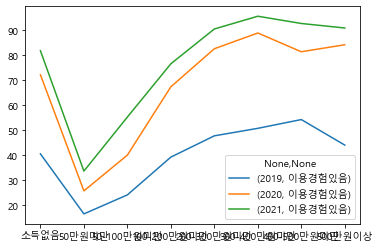

In [63]:
ott_ex_income.plot()

<AxesSubplot:>

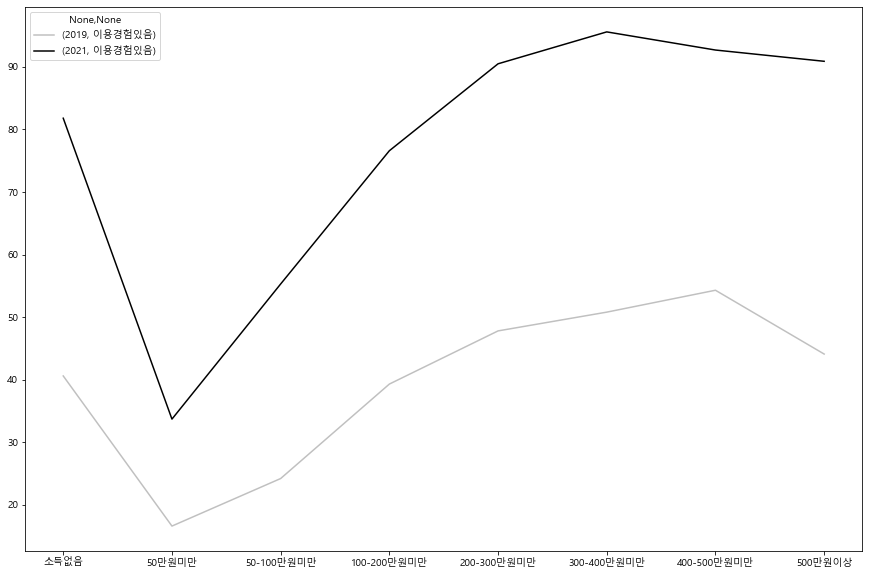

In [293]:
# 대한씨

color=["silver","black"]
ott_ex_income[["2019","2021"]].plot(color=color, figsize=(15,10))

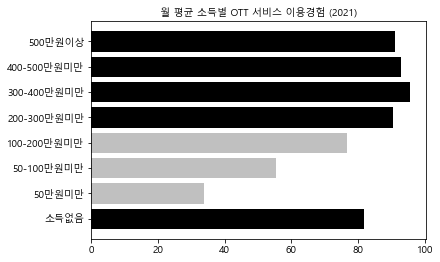

In [280]:
# 대한씨 - 이용 경험 소득별 그래프

experience = ott_ex_income.T.columns ## 지출액, x축 눈금에 표시될 라벨
 
## 시각화
colors = ['black','silver','silver','silver','black','black','black','black'] ## 색상 지정
ytick_label_position = list(range(len(experience))) ## x축 눈금 라벨이 표시될 x좌표
plt.yticks(ytick_label_position, experience) ## x축 눈금 라벨 출력
 
plt.barh(ytick_label_position, ott_ex_income["2021","이용경험있음"], color=colors) ## 바 차트 출력
plt.title('월 평균 소득별 OTT 서비스 이용경험 (2021)',fontsize=10) ## 타이틀 출력

plt.show()

In [279]:
ott_rex = ott_ex.loc["지역"][["2019","2021"]]

(ott_rex["2021","이용경험있음"] - ott_rex["2019","이용경험있음"])/ ott_rex["2019","이용경험있음"]*100

서울    148.997135
부산     53.818182
대구    121.194030
인천    111.970075
광주    159.649123
대전     22.802198
울산     31.464174
경기    123.719677
강원    110.365854
충북     19.553073
충남     18.463811
전북    130.083565
전남    567.500000
경북    157.676349
경남     60.887949
제주     50.815851
세종     25.745257
dtype: float64

### 지역별 극장수


In [3]:
region_theater=pd.read_excel("data/영화관_지역별_종합.xlsx", header = 4, 
                             usecols = "A,B")


region_theater.columns = ["지역","영화관수"]
region_theater

,지역,영화관수
0,서울시,97
1,경기도,148
2,강원도,28
3,충청북도,22
4,충청남도,31
5,경상북도,33
6,경상남도,38
7,전라북도,30
8,전라남도,23
9,제주도,7


In [258]:
rt=region_theater.drop(17,axis=0).set_index("지역")

rt.rename(index={"충청북도":"충북", "충청남도":"충남", "경상북도":"경북", "경상남도":"경남", "전라북도":"전북", "전라남도":"전남"}
          ,inplace= True)

rt = rt.reset_index()

In [259]:
region=[]
for r in rt.index:
    do_si=rt["지역"][r][0:2]
    region.append(do_si)
print(region)

rt["지역_new"] = region

del rt["지역"]
rt=rt[["지역_new","영화관수"]]

['서울', '경기', '강원', '충북', '충남', '경북', '경남', '전북', '전남', '제주', '부산', '대구', '대전', '울산', '인천', '광주', '세종']


In [260]:
rt.rename(columns={"지역_new":"지역"}, inplace=True)
rt = rt.set_index("지역").sort_index()
rt

,영화관수
지역,
강원,28
경기,148
경남,38
경북,33
광주,19
대구,24
대전,17
부산,34
서울,97


In [261]:
re=ott_ex.loc["지역"]

re = re.sort_index()
re

2019          2020          2021       
   이용경험있음 이용경험없음 이용경험있음 이용경험없음 이용경험있음 이용경험없음
강원   32.8   67.2   59.4   40.6   69.0   31.0
경기   37.1   62.9   71.1   28.9   83.0   17.0
경남   47.3   52.7   64.9   35.1   76.1   23.9
경북   24.1   75.9   54.5   45.5   62.1   37.9
광주   34.2   65.8   82.0   18.0   88.8   11.2
대구   33.5   66.5   68.4   31.6   74.1   25.9
대전   72.8   27.2   81.8   18.2   89.4   10.6
부산   55.0   45.0   77.6   22.4   84.6   15.4
서울   34.9   65.1   77.3   22.7   86.9   13.1
세종   73.8   26.2   91.5    8.5   92.8    7.2
울산   64.2   35.8   77.8   22.2   84.4   15.6
인천   40.1   59.9   76.0   24.0   85.0   15.0
전남   12.0   88.0   68.9   31.1   80.1   19.9
전북   35.9   64.1   71.6   28.4   82.6   17.4
제주   42.9   57.1   63.9   36.1   64.7   35.3
충남   67.7   32.3   68.2   31.8   80.2   19.8
충북   71.6   28.4   79.6   20.4   85.6   14.4

In [262]:
re["","영화관수"] = rt["영화관수"]
re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (2019, 이용경험있음)  17 non-null     float64
 1   (2019, 이용경험없음)  17 non-null     float64
 2   (2020, 이용경험있음)  17 non-null     float64
 3   (2020, 이용경험없음)  17 non-null     float64
 4   (2021, 이용경험있음)  17 non-null     float64
 5   (2021, 이용경험없음)  17 non-null     float64
 6   (, 영화관수)        17 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.1+ KB


In [263]:
#중간_저장
re.to_excel("data/region_ott_ex.xlsx")
region_ott_ex=pd.read_excel("data/region_ott_ex.xlsx", header =[0,1],
                           index_col=0)
region_ott_ex

2019          2020          2021            
   이용경험있음 이용경험없음 이용경험있음 이용경험없음 이용경험있음 이용경험없음 영화관수
강원   32.8   67.2   59.4   40.6   69.0   31.0   28
경기   37.1   62.9   71.1   28.9   83.0   17.0  148
경남   47.3   52.7   64.9   35.1   76.1   23.9   38
경북   24.1   75.9   54.5   45.5   62.1   37.9   33
광주   34.2   65.8   82.0   18.0   88.8   11.2   19
대구   33.5   66.5   68.4   31.6   74.1   25.9   24
대전   72.8   27.2   81.8   18.2   89.4   10.6   17
부산   55.0   45.0   77.6   22.4   84.6   15.4   34
서울   34.9   65.1   77.3   22.7   86.9   13.1   97
세종   73.8   26.2   91.5    8.5   92.8    7.2    5
울산   64.2   35.8   77.8   22.2   84.4   15.6    9
인천   40.1   59.9   76.0   24.0   85.0   15.0   27
전남   12.0   88.0   68.9   31.1   80.1   19.9   23
전북   35.9   64.1   71.6   28.4   82.6   17.4   30
제주   42.9   57.1   63.9   36.1   64.7   35.3    7
충남   67.7   32.3   68.2   31.8   80.2   19.8   31
충북   71.6   28.4   79.6   20.4   85.6   14.4   22

In [268]:
region_ott_ex["2021"].sort_values(by="이용경험있음", ascending=False)
region_ott_ex["2021"].sort_values(by="이용경험없음", ascending=False)

,이용경험있음,이용경험없음,영화관수
경북,62.1,37.9,33
제주,64.7,35.3,7
강원,69.0,31.0,28
대구,74.1,25.9,24
경남,76.1,23.9,38
전남,80.1,19.9,23
충남,80.2,19.8,31
전북,82.6,17.4,30
경기,83.0,17.0,148
울산,84.4,15.6,9


In [ ]:
# 2021 기준, 영화관수가 이용경험과 연관있을까??
# 아니면 2019 , 2021의 이용경험 증가가 -> 영화관수와 관련있을까?

# 이용경험있음 증가률이 큰 지역일수록 수가 적다
# 이용경험없음의 증가률이 작은 지역일수록 영화관 수가 많다.


In [ ]:
# 개봉 영화 수와 이용률 관계

### 월평균 지출금액

In [4]:
month_sub=pd.read_excel("data/OTT서비스_월평균_지출_금액.xlsx", header = 1, index_col=[0,1])
month_sub

사례수 (명)  5천원 미만 (%)  5천원 - 1만원 미만 (%)  \
구분별(1) 구분별(2)                                               
전체     소계              1068         5.9              29.3   
성별     남                551         5.8              27.3   
       여                517         5.9              31.4   
연령     만10대미만             1         0.0               0.0   
       만10-19세           45         8.6              18.8   
       만20-29세          349         8.5              28.6   
       만30-39세          357         5.8              31.2   
       만40-49세          223         2.3              28.6   
       만50-59세           76         3.9              37.7   
       만60-69세           15         0.0               3.9   
       만70세이상             2         0.0               0.0   
월평균소득  소득없음             223         7.7              22.3   
       50만원미만            29        35.1              46.0   
       50-100만원미만        21         2.0              50.1   
       100-200만원미만      102         2.4              28.1   
       200-300만원미만      398         5.2              34.2   
       300-400만원미만      222         4.0              26.1   
       400-500만원미만       48         5.5              19.7   
       500만원이상           24         0.0              28.3   
가구원수1  1인가구             220         0.0              41.1   
       2인가구             225         7.5              24.8   
       3인이상가구           623         7.3              26.8   

                    1만원 - 1만 5천원 미만 (%)  1만 5천원 - 2만원 미만 (%)  \
구분별(1) 구분별(2)                                                  
전체     소계                          39.5                 14.6   
성별     남                           41.0                 14.5   
       여                           38.0                 14.7   
연령     만10대미만                     100.0                  0.0   
       만10-19세                     52.8                 11.9   
       만20-29세                     32.3                 16.6   
       만30-39세                     39.6                 14.8   
       만40-49세                     47.3                 10.6   
       만50-59세                     35.4                 15.6   
       만60-69세                     63.2                 28.1   
       만70세이상                      81.3                  0.0   
월평균소득  소득없음                        44.8                 13.1   
       50만원미만                      14.7                  2.3   
       50-100만원미만                  26.0                 12.0   
       100-200만원미만                 37.6                 15.0   
       200-300만원미만                 41.0                 13.5   
       300-400만원미만                 33.8                 20.5   
       400-500만원미만                 45.9                 16.9   
       500만원이상                     55.3                  4.1   
가구원수1  1인가구                        43.0                 10.7   
       2인가구                        28.1                 19.6   
       3인이상가구                      42.4                 14.2   

                    2만원 - 2만 5천원 미만 (%)  2만 5천원 - 3만원 미만 (%)  \
구분별(1) 구분별(2)                                                  
전체     소계                           6.5                  1.2   
성별     남                            6.1                  1.7   
       여                            7.0                  0.8   
연령     만10대미만                       0.0                  0.0   
       만10-19세                      4.1                  1.4   
       만20-29세                      8.6                  1.8   
       만30-39세                      4.0                  0.7   
       만40-49세                      9.0                  1.3   
       만50-59세                      4.4                  0.0   
       만60-69세                      0.0                  4.8   
       만70세이상                      18.7                  0.0   
월평균소득  소득없음                         5.4                  0.8   
       50만원미만                       1.8                  0.0   
       50-100만원미만                   9.8                  0

In [119]:
month_sub.columns


Index(['사례수 (명)', '5천원 미만 (%)', '5천원 - 1만원 미만 (%)', '1만원 - 1만 5천원 미만 (%)',
       '1만 5천원 - 2만원 미만 (%)', '2만원 - 2만 5천원 미만 (%)', '2만 5천원 - 3만원 미만 (%)',
       '3만원 - 3만 5천원 미만 (%)', '3만 5천원 이상 (%)'],
      dtype='object')

In [120]:
month_sub.columns = [["사례수","5천원미만","5천원 - 1만원 미만","1만원 - 1만 5천원 미만","1만 5천원 - 2만원 미만",
    "2만원 - 2만 5천원 미만","2만 5천원 - 3만원 미만","3만원 - 3만 5천원 미만","3만 5천원 이상"]]

# del month_sub["사례수"]

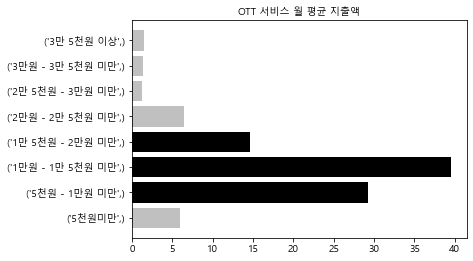

In [155]:
# 월 평균 지출 금액 소계 

fee_category = month_sub.loc["전체"].columns ## 지출액, x축 눈금에 표시될 라벨
 
## 시각화
colors = ['silver','black','black','black','silver','silver','silver','silver'] ## 색상 지정
ytick_label_position = list(range(len(fee_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.yticks(ytick_label_position, fee_category) ## x축 눈금 라벨 출력
 
plt.barh(ytick_label_position, month_sub.loc["전체","소계"], color=colors) ## 바 차트 출력
 
plt.title('OTT 서비스 월 평균 지출액',fontsize=10) ## 타이틀 출력

plt.show()

<AxesSubplot:ylabel='구분별(2)'>

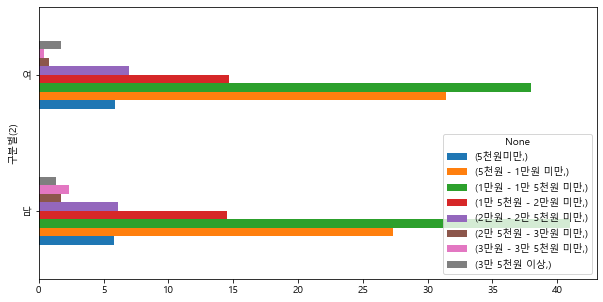

In [114]:
month_sub.loc["성별"].plot.barh(figsize=(10,5))

# 성별로 1만원-1만 5천원 > 5천원-1만원 미만 > 1만 5천원-2만원 미만

<AxesSubplot:xlabel='구분별(2)'>

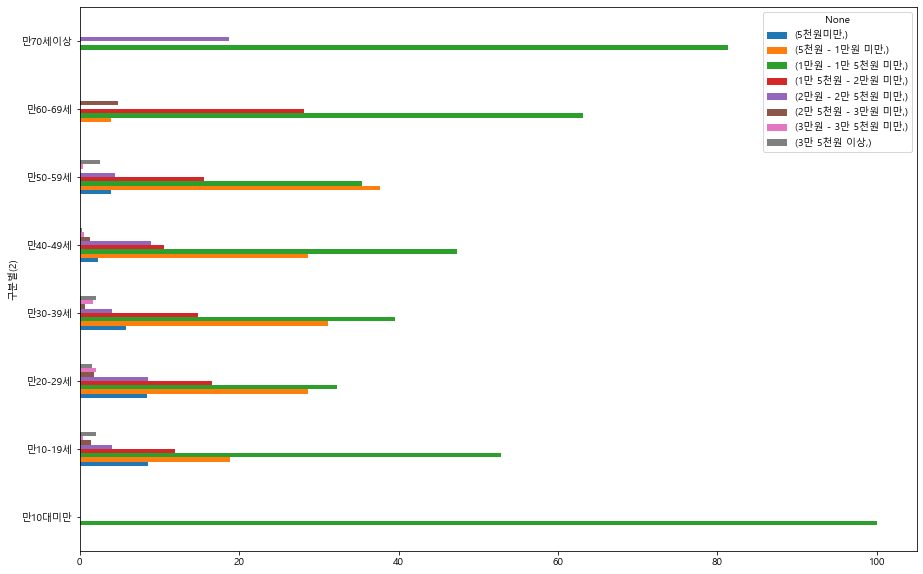

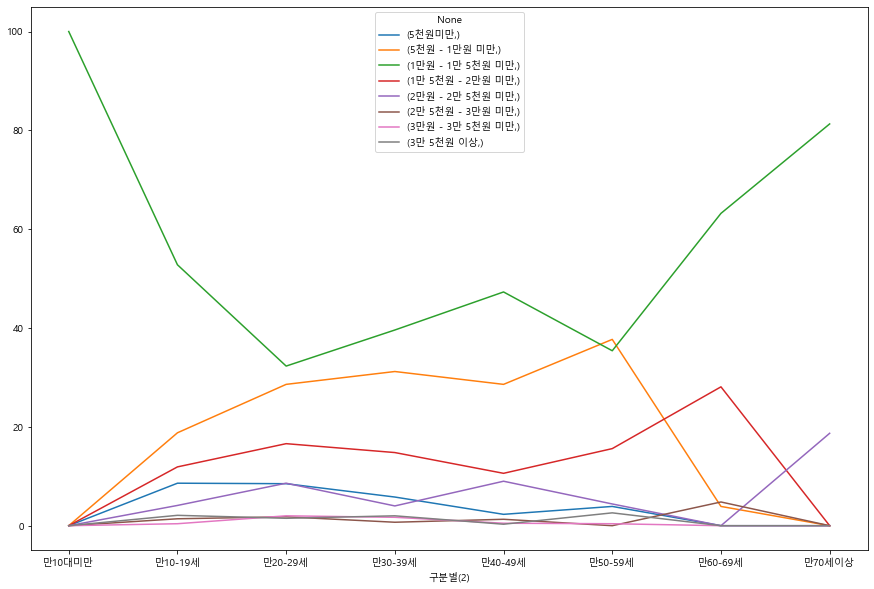

In [102]:
month_sub.loc["연령"].plot.barh(figsize=(15,10))


## 영화 연도별 관람객수

### 1) 전처리

In [4]:
cinema_2019=pd.read_excel("../project_data_raw/관람객수_매출_2019.xlsx", header = [4,5], index_col = 0)
df1=cinema_2019["전체"]

In [5]:
cinema_2020=pd.read_excel("../project_data_raw/관람객수_매출_2020.xlsx", header = [4,5], index_col = 0)
df2=cinema_2020["전체"]

In [6]:
cinema_2021=pd.read_excel("../project_data_raw/관람객수_매출_2021.xlsx", header = [4,5], index_col = 0)
df3=cinema_2021["전체"]

In [7]:
cinema_2022=pd.read_excel("../project_data_raw/관람객수_매출_2022_11.xlsx", header = [4,5], index_col = 0)
df4=cinema_2022["전체"]

In [8]:
# 연도별 데이터 합치기

cinema=pd.concat([df1,df2,df3,df4], axis =0)
cinema.drop(["합계"], axis=0, inplace= True)
cinema.reset_index(inplace=True)

# 파생 변수 만들기- 다중 컬럼 (연도, 월)

y=[]
for i in cinema.index:
    year=cinema["index"][i].strftime('%y-%m-%d %I:%M:%S').split("-")[0]
    y.append(year)
print(y)

cinema["연도"] = y

m=[]
for i in cinema.index:
    month=cinema["index"][i].strftime('%y-%m-%d %I:%M:%S').split("-")[1]
    m.append(month)
print(m)

cinema["월"] = m

['19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']


In [10]:
# 컬럼 순서 바꾸기
cinema=cinema[["연도","월","개봉편수","상영편수","매출액","관객수"]]

In [3]:
# 중간 저장
cinema.to_excel("../project_data_raw/cinema_19_22.xlsx")

NameError: name 'cinema' is not defined

In [25]:
cinema = pd.read_excel("../project_data_raw/cinema_19_22.xlsx", header = 0, index_col=0)

### 시각화

In [26]:
# 시각화를 위한 데이터 셋 1(cinema)
ym=[]
for i in cinema.index:
    year_month=str(cinema["연도"][i]) + "년 "+ str(cinema["월"][i]) +"월"
    ym.append(year_month)
print(ym)

cinema["연_월"] = ym

['19년 1월', '19년 2월', '19년 3월', '19년 4월', '19년 5월', '19년 6월', '19년 7월', '19년 8월', '19년 9월', '19년 10월', '19년 11월', '19년 12월', '20년 1월', '20년 2월', '20년 3월', '20년 4월', '20년 5월', '20년 6월', '20년 7월', '20년 8월', '20년 9월', '20년 10월', '20년 11월', '20년 12월', '21년 1월', '21년 2월', '21년 3월', '21년 4월', '21년 5월', '21년 6월', '21년 7월', '21년 8월', '21년 9월', '21년 10월', '21년 11월', '21년 12월', '22년 1월', '22년 2월', '22년 3월', '22년 4월', '22년 5월', '22년 6월', '22년 7월', '22년 8월', '22년 9월', '22년 10월', '22년 11월']


In [27]:

cinema=cinema[["연도","월","연_월","매출액","관객수"]]
cinema=cinema.set_index(["연_월"])

cinema

,연도,월,매출액,관객수
연_월,,,,
19년 1월,19,1,151161478196,18122443
19년 2월,19,2,189990807970,22277733
19년 3월,19,3,126559017449,14671693
19년 4월,19,4,113184664392,13338962
19년 5월,19,5,154563004957,18062457
19년 6월,19,6,195237798708,22845579
19년 7월,19,7,184101302717,21916465
19년 8월,19,8,208958173044,24786121
19년 9월,19,9,124445262708,14733642


In [7]:
# 시각화를 위한 데이터 셋 2(cinema_new)
cinema_new=cinema.reset_index()
cinema_new

,연_월,연도,월,매출액,관객수
0,19년 1월,19,1,151161478196,18122443
1,19년 2월,19,2,189990807970,22277733
2,19년 3월,19,3,126559017449,14671693
3,19년 4월,19,4,113184664392,13338962
4,19년 5월,19,5,154563004957,18062457
5,19년 6월,19,6,195237798708,22845579
6,19년 7월,19,7,184101302717,21916465
7,19년 8월,19,8,208958173044,24786121
8,19년 9월,19,9,124445262708,14733642
9,19년 10월,19,10,123754715700,14858383


In [68]:
# 시각화를 위한 데이터 셋 3(cinema_set)
# 그룹화
cinema_set = cinema.groupby(["연도","월"]).sum()
cinema_set

매출액       관객수
연도 월                         
19 1   151161478196  18122443
   2   189990807970  22277733
   3   126559017449  14671693
   4   113184664392  13338962
   5   154563004957  18062457
   6   195237798708  22845579
   7   184101302717  21916465
   8   208958173044  24786121
   9   124445262708  14733642
   10  123754715700  14858383
   11  155388033415  18600679
   12  186644820812  22464620
20 1   143681061430  16843695
   2    62303647980   7372370
   3    15152718950   1834722
   4     7515666040    972572
   5    12393715040   1526236
   6    32760133800   3864533
   7    47239833650   5618701
   8    77213885539   8834699
   9    26031868372   2988647
   10   41527819390   4633609
   11   32150024750   3595310
   12   12404343250   1438873
21 1    15793377040   1786117
   2    28738934810   3111920
   3    30158665300   3256510
   4    23542365690   2562285
   5    41071280050   4379476
   6    47026572590   4927990
   7    68341733480   6976451
   8    76386142710   7910082
   9    52212487313   5412319
   10   50827351270   5192139
   11   65932033239   6512815
   12   84508044908   8502983
22 1    55601495920   5718042
   2    30947547160   3272019
   3    27012472686   2799159
   4    30419602560   3119523
   5   150754397160  14559868
   6   158167629310  15474601
   7   170450001387  16290442
   8   152301318285  14956595
   9   101877779808   9860584
   10   61572723594   6201109
   11   40130641512   3946579

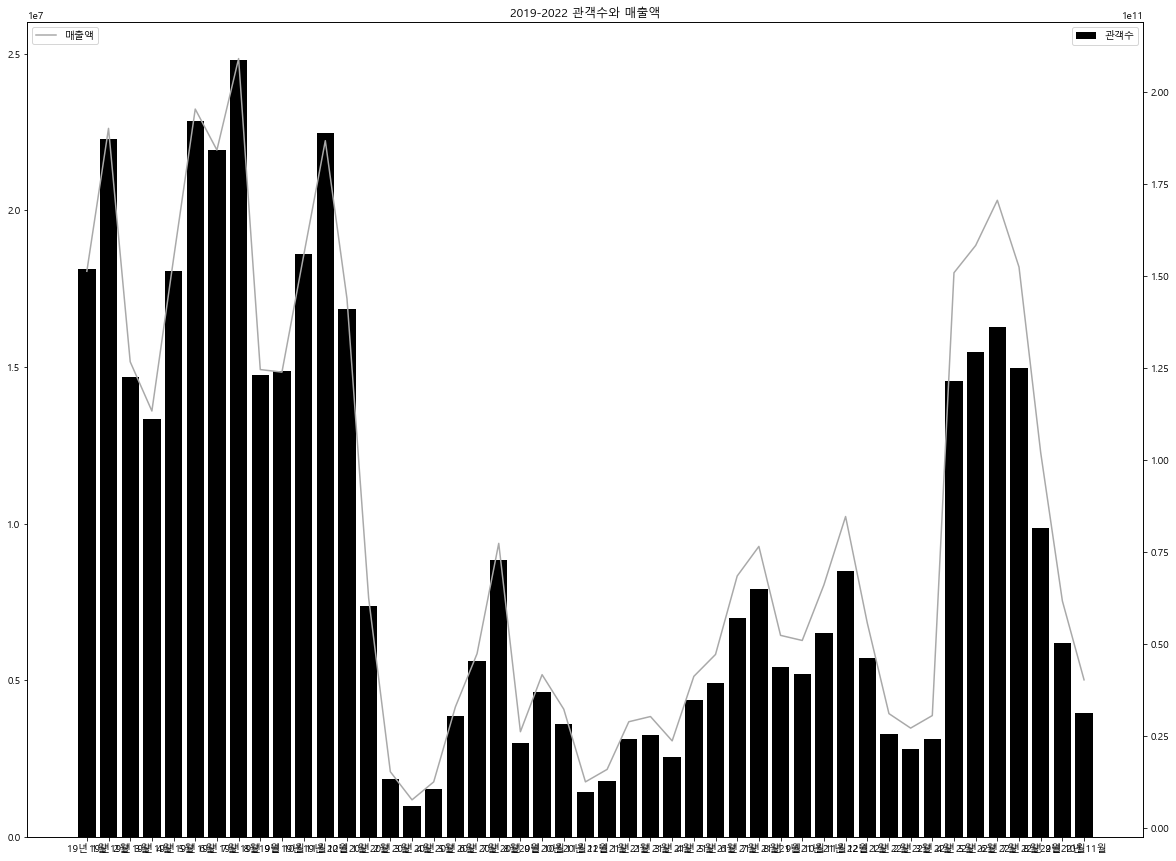

In [160]:
# 2019- 2022 까지의 영화관 관객수와 매출액 추이 변화

fig = plt.figure(figsize=(20,15))
axes = fig.add_subplot(111)
ax1 = axes.twinx()

axes.bar(cinema.index,cinema["관객수"], color = 'black', label = "관객수")
ax1.plot(cinema.index,cinema["매출액"], color = 'darkgray', label = "매출액")

axes.set_title("2019-2022 관객수와 매출액")

axes.legend(loc=1)
ax1.legend(loc=2)




In [28]:
#del cinema["매출액"]

c=cinema.groupby(["연도","월"]).sum().drop([19,22], axis=0, level=0).reset_index()
c

,연도,월,매출액,관객수
0,20,1,143681061430,16843695
1,20,2,62303647980,7372370
2,20,3,15152718950,1834722
3,20,4,7515666040,972572
4,20,5,12393715040,1526236
5,20,6,32760133800,3864533
6,20,7,47239833650,5618701
7,20,8,77213885539,8834699
8,20,9,26031868372,2988647
9,20,10,41527819390,4633609


Text(18, 9000000, '롯데시네마, 메가박스 2차 인상')

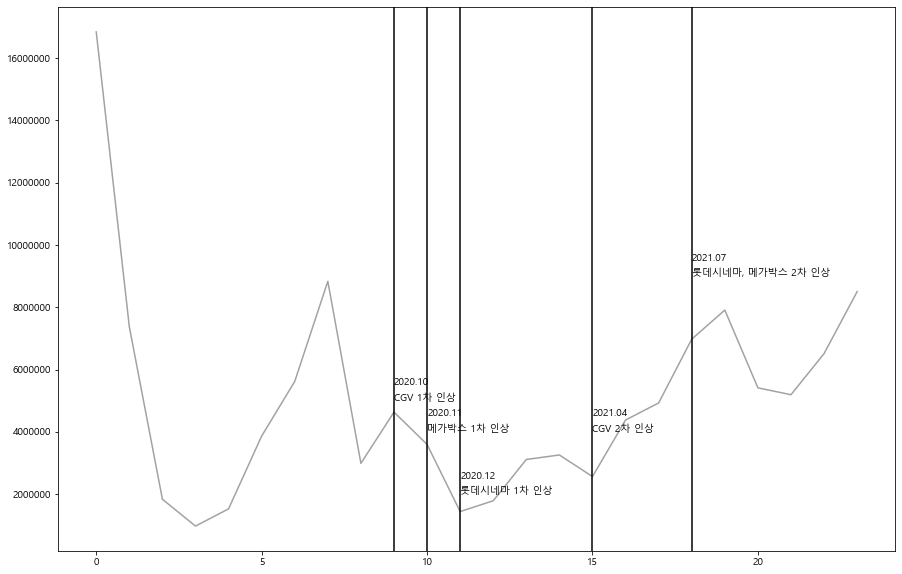

In [61]:
# 2020-2021 까지의 영화관 관객수와 티켓값 인상

ax1 = c["관객수"].plot.line(figsize=(15,10), color = '#A1A1A7')
ax1.get_yaxis().get_major_formatter().set_scientific(False)

##################################
# 막대 심기

plt.axvline(x=9, color = "#000000") 
plt.axvline(x=10, color = "#000000") 
plt.axvline(x=11,color = "#000000")

plt.axvline(x=15, color = "#000000") 
plt.axvline(x=18,color = "#000000") 

plt.text(9,5500000, "2020.10")
plt.text(9,5000000, "CGV 1차 인상")

plt.text(10,4500000, "2020.11")
plt.text(10,4000000, "메가박스 1차 인상")

plt.text(11,2500000, "2020.12")
plt.text(11,2000000, "롯데시네마 1차 인상")

plt.text(15,4500000, "2021.04")
plt.text(15,4000000, "CGV 2차 인상")

plt.text(18,9500000, "2021.07")
plt.text(18,9000000, "롯데시네마, 메가박스 2차 인상")


In [ ]:
# 2019- 2022 까지의 영화관 관객수와 티켓값 인상

cinema_new["관객수"].plot.line(figsize=(20,15))

##################################
# 막대 심기

plt.axvline(x=21, color = "r") 
plt.axvline(x=22, color = "r") 
plt.axvline(x=23,color = "r")

plt.axvline(x=27, color = "r") 
plt.axvline(x=30,color = "r") 

plt.text(21,5000000, "CGV 1차 인상")
plt.text(22,4000000, "메가박스 1차 인상")
plt.text(23,1000000, "롯데시네마 1차 인상")

plt.text(27,4000000, "CGV 2차 인상")
plt.text(30,9000000, "롯데시네마, 메가박스 2차 인상")


Text(0.5, 1.0, '2022')

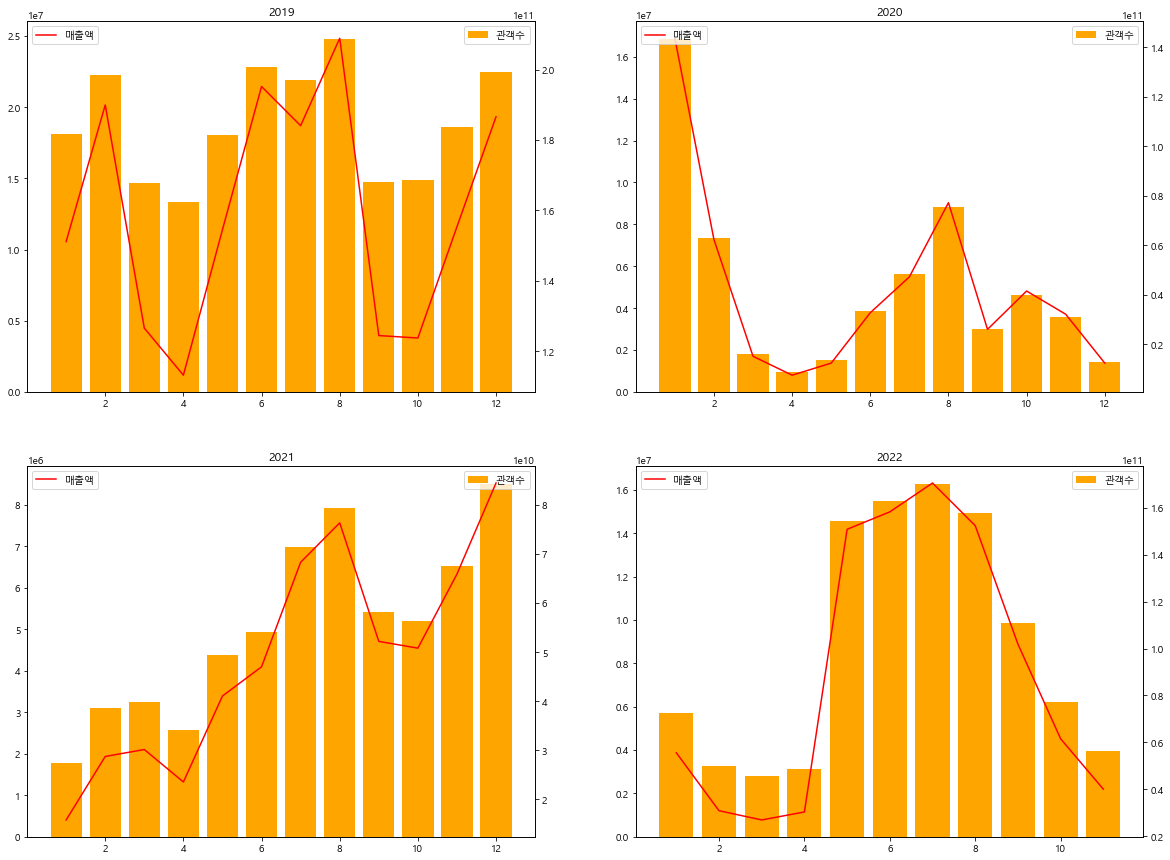

In [202]:
# 2019- 2022 까지의 영화관 관객수와 매출액 연도별로 잘라서 보기


fig = plt.figure(figsize=(20,15))

axes1 = fig.add_subplot(221)
ax1 = axes1.twinx()

axes1.bar(cinema_set.loc[19].index,cinema_set.loc[19]["관객수"], color = 'orange', label = '관객수')
ax1.plot(cinema_set.loc[19].index,cinema_set.loc[19]["매출액"], color = 'red',label = '매출액')

axes1.legend(loc=1)
ax1.legend(loc=2)

axes1.set_title("2019")
###################

axes2 = fig.add_subplot(222)
ax2 = axes2.twinx()

axes2.bar(cinema_set.loc[20].index,cinema_set.loc[20]["관객수"], color = 'orange', label = '관객수')
ax2.plot(cinema_set.loc[20].index,cinema_set.loc[20]["매출액"], color = 'red',label = '매출액')

axes2.legend(loc=1)
ax2.legend(loc=2)

axes2.set_title("2020")
# ###################

axes3 = fig.add_subplot(223)
ax3 = axes3.twinx()

axes3.bar(cinema_set.loc[21].index,cinema_set.loc[21]["관객수"], color = 'orange', label = '관객수')
ax3.plot(cinema_set.loc[21].index,cinema_set.loc[21]["매출액"], color = 'red',label = '매출액')

axes3.legend(loc=1)
ax3.legend(loc=2)

axes3.set_title("2021")
# ###################

axes4 = fig.add_subplot(224)
ax4 = axes4.twinx()

axes4.bar(cinema_set.loc[22].index,cinema_set.loc[22]["관객수"], color = 'orange', label = '관객수')
ax4.plot(cinema_set.loc[22].index,cinema_set.loc[22]["매출액"], color = 'red',label = '매출액')
axes4.legend(loc=1)
ax4.legend(loc=2)

axes4.set_title("2022")

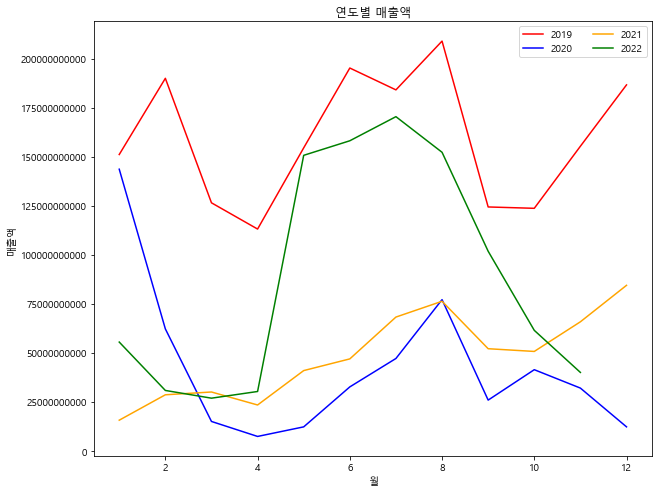

In [230]:
# 연도별 매출액

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

ax1.plot(cinema_set.loc[19].index,cinema_set.loc[19]["매출액"], color = "red",label = '2019') 
ax1.plot(cinema_set.loc[20].index,cinema_set.loc[20]["매출액"], color = "blue",label = '2020') 
ax1.plot(cinema_set.loc[21].index,cinema_set.loc[21]["매출액"], color = "orange",label = '2021')
ax1.plot(cinema_set.loc[22].index,cinema_set.loc[22]["매출액"], color = "green",label = '2022')

ax1.legend(loc=1, ncol=2)
ax1.set_title("연도별 매출액")
plt.xlabel("월")
plt.ylabel("매출액")


ax1.get_yaxis().get_major_formatter().set_scientific(False)

# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

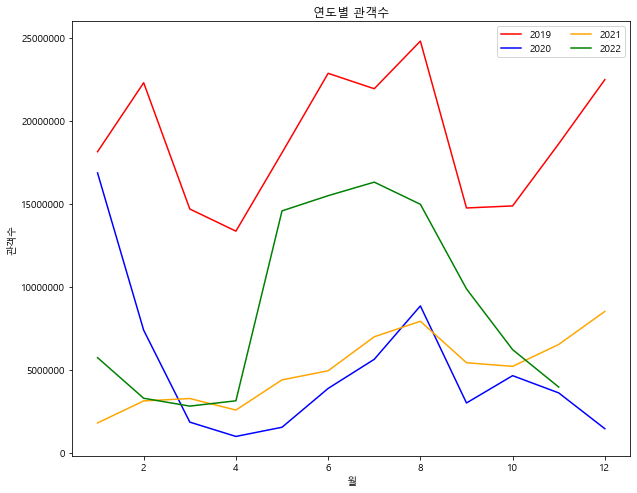

In [227]:
# 연도별 관객수

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

ax1.plot(cinema_set.loc[19].index,cinema_set.loc[19]["관객수"], color = "red", label = '2019' ) 
ax1.plot(cinema_set.loc[20].index,cinema_set.loc[20]["관객수"], color = "blue", label = '2020') 
ax1.plot(cinema_set.loc[21].index,cinema_set.loc[21]["관객수"], color = "orange", label = '2021')
ax1.plot(cinema_set.loc[22].index,cinema_set.loc[22]["관객수"], color = "green",label = '2022')

ax1.legend(loc=1, ncol=2)
ax1.set_title("연도별 관객수")
plt.xlabel("월")
plt.ylabel("관객수")

ax1.get_yaxis().get_major_formatter().set_scientific(False)

### 코로나 확진자 수(20-21) - 다시!

In [142]:
corona=pd.read_csv("../project_data_raw/전국코로나확진자수.csv", index_col=0)

corona.info()
corona.sort_values(by="incDec",ascending= False).head(10)
corona=corona.groupby(["year","month"]).sum()

corona=corona.drop([2022], axis=0, level=0)
corona.sort_values(by="incDec", ascending=False).head(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    33 non-null     int64  
 1   month   33 non-null     int64  
 2   incDec  33 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


incDec
year month          
2020 3        5560.0
     4        1241.0
     5         703.0
     6        1385.0
     7        1509.0
     8        5685.0
     9        4051.0
     10       2864.0
     11       8219.0
     12      32638.0
2021 1       18215.0
     2       11827.0
     3       13430.0
     4       20148.0
     5       17356.0
     6       16109.0
     7       42035.0
     8       54897.0
     9       59899.0
     10      53450.0
     11      85232.0
     12     183680.0

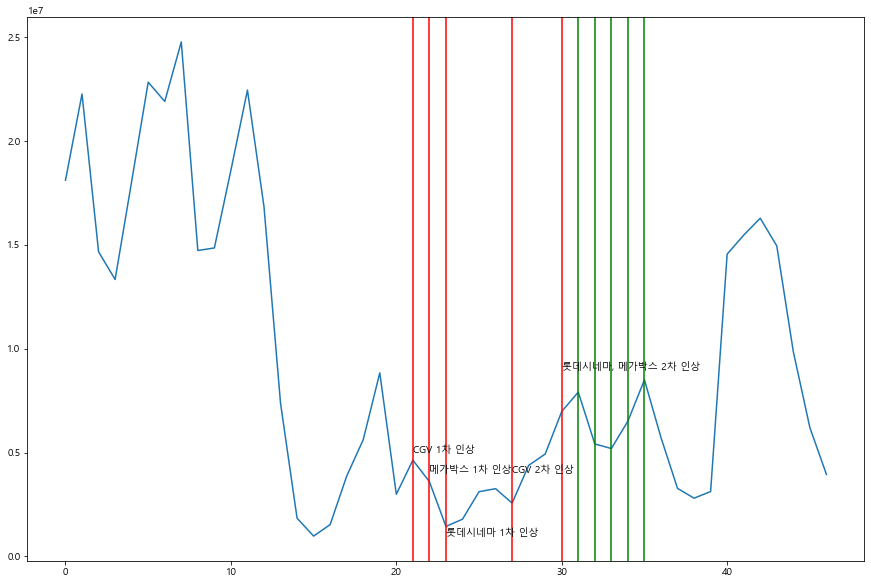

In [144]:
cinema_new["관객수"].plot.line(figsize=(15,10))

##################################
# 막대 심기 - 영화

plt.axvline(x=21, color = "r") 
plt.axvline(x=22, color = "r") 
plt.axvline(x=23,color = "r")

plt.axvline(x=27, color = "r") 
plt.axvline(x=30,color = "r") 

plt.text(21,5000000, "CGV 1차 인상")
plt.text(22,4000000, "메가박스 1차 인상")
plt.text(23,1000000, "롯데시네마 1차 인상")

plt.text(27,4000000, "CGV 2차 인상")
plt.text(30,9000000, "롯데시네마, 메가박스 2차 인상")


##################################
# 막대 심기 - 코로나

plt.axvline(x=31, color = "g") 
plt.axvline(x=32, color = "g") 
plt.axvline(x=33, color = "g") 
plt.axvline(x=34,color = "g")
plt.axvline(x=35, color = "g") 



,연_월,연도,월,매출액,관객수
0,19년 1월,19,1,151161478196,18122443
1,19년 2월,19,2,189990807970,22277733
2,19년 3월,19,3,126559017449,14671693
3,19년 4월,19,4,113184664392,13338962
4,19년 5월,19,5,154563004957,18062457
5,19년 6월,19,6,195237798708,22845579
6,19년 7월,19,7,184101302717,21916465
7,19년 8월,19,8,208958173044,24786121
8,19년 9월,19,9,124445262708,14733642
9,19년 10월,19,10,123754715700,14858383
